# PART A

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import pandas as pd

In [2]:
#!nvidia-smi

In [2]:
torch.__version__

'1.9.1.post3'

In [3]:
#torch.cuda.is_available(),torch.cuda.current_device(),torch.cuda.get_device_name(1)

In [4]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# X_train=pd.read_csv('devanagri_data/train_data_shuffled.csv',header=None)
# X_test=pd.read_csv('devanagri_data/public_test.csv',header=None)
# X_train,y_train=X_train.iloc[:,:-1].to_numpy().astype(np.float32),X_train.iloc[:,-1].to_numpy().astype(np.float32)
# X_test,y_test=X_test.iloc[:,:-1].to_numpy().astype(np.float32),X_test.iloc[:,-1].to_numpy().astype(np.float32)
# X_train,X_test=X_train.reshape((-1,1,32,32)),X_test.reshape((-1,1,32,32))
# X_train.shape,y_train.shape,X_test.shape,y_test.shape


((78200, 1, 32, 32), (78200,), (4600, 1, 32, 32), (4600,))

In [6]:
# class dev_dataset(Dataset):
#     X=y=l=0
#     def __init__(self,X,y):
#         self.l=X.shape[0]
#         self.X=torch.from_numpy(X).cuda()
#         self.y=torch.LongTensor(y).cuda()
#     def __len__(self):
#         return self.l
#     def __getitem__(self,i):
#         return self.X[i],self.y[i]
    

In [7]:
# class CNN_A(nn.Module):
#     def __init__(self):
#         super(CNN_A,self).__init__()
#         self.c1=nn.Conv2d(1,32,3)
#         self.bn1=nn.BatchNorm2d(32)
#         self.c2=nn.Conv2d(32,64,3)
#         self.bn2=nn.BatchNorm2d(64)
#         self.c3=nn.Conv2d(64,256,3)
#         self.bn3=nn.BatchNorm2d(256)
#         self.c4=nn.Conv2d(256,512,3)
#         self.fc1=nn.Linear(512,256)
#         self.fc2=nn.Linear(256,46)
#         self.dropout=nn.Dropout(.2)
#         self.p1=nn.MaxPool2d(2,1)
#         self.p2=nn.MaxPool2d(2,2)
#     def forward(self,X):
#         X=self.p2(F.relu(self.bn1(self.c1(X))))
#         X=self.p2(F.relu(self.bn2(self.c2(X)))) 
#         X=self.p1(F.relu(self.bn3(self.c3(X))))        
#         X=F.relu(self.c4(X))
#         X=X.view(-1,512)
#         X=self.fc2(self.dropout(F.relu(self.fc1(X))))
#         return X
# def acc(y_true,y_preds):
#     y_preds=torch.argmax(y_preds,dim=1).squeeze()
#     return (y_true==y_preds).sum().item()/len(y_true)
    

In [8]:
# a=CNN_A().cuda()
# b=dev_dataset(X_train,y_train)
# d=a.forward(b.__getitem__(0)[0].reshape(1,1,32,32))
# d.shape

In [9]:
# bs=400
# train_data=DataLoader(dev_dataset(X_train,y_train),batch_size=bs,shuffle=False)
# # X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
# X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
# cnn=CNN_A()
# cnn=cnn.cuda()
# opt=optim.Adam(cnn.parameters(),lr=1e-4)
# loss=nn.CrossEntropyLoss()

In [10]:
# def train(cnn,train_data,epochs,opt,loss,X_test,y_test):
#     losses=[]
#     accuracies=[]
#     for i in range(epochs):
#         l=0
#         for j,(X,y) in enumerate(train_data):
#             #print(X.shape,y.shape,type(X),type(y))
#             yh=cnn(X)
#             train_loss=loss(yh,y)
#             opt.zero_grad()
#             l+=train_loss.item()
#             train_loss.backward()
#             opt.step()
#         l/=len(train_data) 
#         with torch.no_grad():
#             losses.append(l)
#             y_preds=cnn(X_test)
#             accuracies.append(acc(y_test,y_preds))
#             print("Epoch: "+str(i+1)+" Train loss: "+str(losses[-1])+" test accuracy: " +str(accuracies[-1]))        
#     return losses,accuracies      
            
        
        
        

In [11]:
# epochs=8
# losses,accuracies=train(cnn,train_data,epochs,opt,loss,X_test,y_test)

# f=open('loss.txt','w')
# for l in losses:
#     f.write(str(l))
#     f.write('\n')
# f.close()    
# f=open('accuracy.txt','w')
# for l in accuracies:
#     f.write(str(l))
#     f.write('\n')
# f.close()
# torch.save(cnn.state_dict(),'./model.pth') 

Epoch: 1 Train loss: 2.141618229600848 test accuracy: 0.7615217391304347
Epoch: 2 Train loss: 0.625746605803772 test accuracy: 0.8797826086956522
Epoch: 3 Train loss: 0.3616248066632115 test accuracy: 0.9202173913043479
Epoch: 4 Train loss: 0.2501646329705812 test accuracy: 0.9382608695652174
Epoch: 5 Train loss: 0.18843132512149763 test accuracy: 0.9482608695652174
Epoch: 6 Train loss: 0.15078934339084188 test accuracy: 0.9558695652173913
Epoch: 7 Train loss: 0.12248340952305162 test accuracy: 0.9602173913043478
Epoch: 8 Train loss: 0.1014196918517047 test accuracy: 0.9634782608695652


In [12]:
# y_preds=torch.argmax(cnn(X_test),dim=1).squeeze().cpu().numpy()
# for l in y_preds:
#     print(l)


41
38
11
30
17
9
6
41
31
16
5
14
9
21
6
7
14
19
10
45
25
20
23
18
2
26
6
30
30
11
19
25
43
1
27
30
8
33
45
27
23
28
18
44
29
45
10
3
44
39
27
33
15
1
29
10
11
17
6
42
4
25
14
13
2
15
7
14
17
38
45
24
13
25
35
24
44
38
3
28
39
25
21
35
31
28
37
35
35
15
42
44
20
39
5
31
32
15
1
9
1
12
23
40
23
40
16
20
24
40
41
19
28
3
44
15
35
33
17
27
20
31
34
12
14
39
23
15
43
41
23
0
26
32
32
45
40
17
22
21
1
36
27
22
41
19
6
10
2
6
8
34
9
25
16
28
12
20
22
40
19
45
42
2
15
4
44
28
39
13
33
28
33
5
45
1
36
27
38
15
42
13
39
23
5
12
18
7
33
10
36
34
36
41
13
37
25
8
45
29
2
8
1
15
14
25
19
13
7
7
14
41
2
19
1
13
43
33
43
11
20
4
0
43
33
14
27
31
4
27
20
29
7
36
35
31
9
21
42
33
30
43
25
30
45
10
20
28
6
27
42
25
27
28
4
16
19
9
5
20
2
29
28
32
38
17
8
38
25
15
14
31
40
3
19
24
1
18
43
29
21
41
15
16
44
28
39
12
1
32
10
6
19
11
3
26
19
14
37
30
20
34
23
36
21
0
36
30
27
15
40
45
36
39
13
16
35
25
40
34
31
16
31
27
20
9
41
31
41
3
16
19
11
45
8
29
15
36
45
45
40
0
32
22
19
13
40
23
31
7
17
17
39
24
22


8
27
18
22
23
16
19
10
3
4
12
3
27
40
19
37
17
18
24
26
17
27
27
34
23
39
17
44
25
10
9
44
11
7
40
26
30
15
45
10
19
41
32
1
13
6
38
31
33
0
33
25
27
17
31
27
19
26
34
28
32
45
11
25
13
39
6
19
8
33
42
30
4
29
29
3
13
21
25
16
16
0
32
20
41
42
43
44
43
25
10
0
5
18
15
32
41
12
31
0
44
18
21
3
7
29
35
14
15
34
28
2
41
33
10
18
39
38
7
10
22
45
35
22
30
19
8
35
29
24
30
14
26
9
42
28
2
5
8
45
9
44
10
8
32
37
40
9
27
9
42
14
13
2
34
45
15
20
35
41
1
2
30
39
34
20
45
38
32
44
37
42
16
30
12
13
8
8
45
18
13
22
2
5
28
30
37
25
31
19
3
35
25
28
14
5
38
37
22
11
11
22
28
44
10
1
8
8
6
37
28
23
6
27
11
37
45
15
9
37
34
14
12
5
22
25
3
31
4
17
19
8
31
16
20
18
1
26
25
34
36
26
10
12
39
8
11
3
30
31
5
4
38
25
11
17
31
11
14
38
43
30
30
9
34
25
5
21
14
29
6
17
4
33
20
23
5
42
28
21
17
1
42
17
15
0
4
22
22
0
8
33
4
22
38
5
43
37
7
19
15
23
40
4
44
1
20
27
7
7
37
1
14
4
35
37
37
5
0
32
45
2
11
38
10
1
15
21
7
3
24
20
41
20
15
27
28
21
17
0
37
28
5
36
15
27
32
27
37
40
40
34
37
1
27
13
14
24
24
40
43

In [3]:
# DataLoader Class
# if BATCH_SIZE = N, dataloader returns images tensor of size [N, C, H, W] and labels [N]
class DevanagariDataset(Dataset):
    
    def __init__(self, data_csv, train = True , img_transform = None):
        """
        Dataset init function
        
        INPUT:
        data_csv: Path to csv file containing [data, labels]
        train: 
            True: if the csv file has [data, labels] (Train data and Public Test Data) 
            False: if the csv file has only [data] and labels are not present.
        img_transform: List of preprocessing operations need to performed on image. 
        """
        self.data_csv = data_csv
        self.img_transform = img_transform
        self.is_train = train
        
        data = pd.read_csv(data_csv, header=None)
        if self.is_train:
            images = data.iloc[:,:-1].to_numpy()
            labels = data.iloc[:,-1].astype(int)
        else:
            images = data.iloc[:,:]
            labels = None
        
        self.images = images
        self.labels = labels
        print("Total Images: {}, Data Shape = {}".format(len(self.images), images.shape))
        
    def __len__(self):
        """Returns total number of samples in the dataset"""
        return len(self.images)
    
    def __getitem__(self, idx):
        """
        Loads image of the given index and performs preprocessing.
        
        INPUT: 
        idx: index of the image to be loaded.
        
        OUTPUT:
        sample: dictionary with keys images (Tensor of shape [1,C,H,W]) and labels (Tensor of labels [1]).
        """
        image = self.images[idx]
        image = np.array(image).astype(np.uint8).reshape(32, 32, 1)
        
        if self.is_train:
            label = self.labels[idx]
        else:
            label = -1
        
        image = self.img_transform(image)
#         print(image.shape, label, type(image))
        #sample = {"images": image, "labels": label}
        return image,label

In [4]:
# Data Loader Usage

BATCH_SIZE = 200 # Batch Size. Adjust accordingly
NUM_WORKERS = 0 # Number of threads to be used for image loading. Adjust accordingly.

img_transforms = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])

# Train DataLoader
train_data = 'devanagri_data/train_data_shuffled.csv' # Path to train csv file
train_dataset = DevanagariDataset(data_csv = train_data, train=True, img_transform=img_transforms)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=False, num_workers = NUM_WORKERS)

# Test DataLoader
test_data = 'devanagri_data/public_test.csv' # Path to test csv file
test_dataset = DevanagariDataset(data_csv = test_data, train=True, img_transform=img_transforms)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle=False, num_workers = NUM_WORKERS)
n=test_dataset.__len__()

Total Images: 78200, Data Shape = (78200, 1024)


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Total Images: 4600, Data Shape = (4600, 1024)


In [5]:
len(train_loader)

391

In [6]:
torch.__version__

'1.9.1.post3'

In [11]:
class CNN_A(nn.Module):
    def __init__(self):
        super(CNN_A,self).__init__()
        self.c1=nn.Conv2d(1,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,256,3)
        self.bn3=nn.BatchNorm2d(256)
        self.c4=nn.Conv2d(256,512,3)
        self.fc1=nn.Linear(512,256)
        self.fc2=nn.Linear(256,46)
        self.dropout=nn.Dropout(.2)
        self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p1(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,512)
        X=self.fc2(self.dropout(F.relu(self.fc1(X))))
        return X
def acc(y_true,y_preds):
    y_preds=torch.argmax(y_preds,dim=1).squeeze()
    return (y_true==y_preds).sum().item()/len(y_true)
bs=200
#train_data=DataLoader(dev_dataset(X_train,y_train),batch_size=bs,shuffle=False)
# X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
#X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
torch.manual_seed(51)
cnn=CNN_A()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
def train(cnn,train_data,epochs,opt,loss,test_data):
    losses=[]
    accuracies=[]
    for i in range(epochs):
        l=0
        for j,(X,y) in enumerate(train_data):
            #print(X.shape,y.shape,type(X),type(y))
            yh=cnn(X.cuda())
            train_loss=loss(yh,y.type(torch.LongTensor).cuda())
            
            
            train_loss.backward()
            opt.step()
            opt.zero_grad()
            with torch.no_grad():
                l+=train_loss.item()
        with torch.no_grad():
            l/=len(train_data) 
        
            c=0
            for j,(X,y) in enumerate(test_data):
            
                losses.append(l)
                y_preds=cnn(X.cuda())
                y_preds=torch.argmax(y_preds,dim=1).squeeze()
                c+=(y.cuda()==y_preds).sum().item()
        
            c/=n    
        accuracies.append(c)
        print("Epoch: "+str(i+1)+" Train loss: "+str(losses[-1])+" test accuracy: " +str(accuracies[-1]))        
    return losses,accuracies      
            

In [12]:
epochs=8
l,a=train(cnn,train_loader,epochs,opt,loss,test_loader)

Epoch: 1 Train loss: 1.359662632884272 test accuracy: 0.8752173913043478
Epoch: 2 Train loss: 0.32990321768519215 test accuracy: 0.9328260869565217
Epoch: 3 Train loss: 0.19394106791376153 test accuracy: 0.9467391304347826
Epoch: 4 Train loss: 0.13565470591721024 test accuracy: 0.9576086956521739
Epoch: 5 Train loss: 0.10027738248029024 test accuracy: 0.9658695652173913
Epoch: 6 Train loss: 0.07670301097490446 test accuracy: 0.9680434782608696
Epoch: 7 Train loss: 0.059538032359365 test accuracy: 0.967391304347826
Epoch: 8 Train loss: 0.04807524788705513 test accuracy: 0.9743478260869565


In [13]:
sum(p.numel() for p in CNN_A().parameters())

1490542

In [12]:
#Testing

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import pandas as pd

In [2]:
class CNN_A(nn.Module):
    def __init__(self):
        super(CNN_A,self).__init__()
        self.c1=nn.Conv2d(1,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,256,3)
        self.bn3=nn.BatchNorm2d(256)
        self.c4=nn.Conv2d(256,512,3)
        self.fc1=nn.Linear(512,256)
        self.fc2=nn.Linear(256,46)
        self.dropout=nn.Dropout(.2)
        self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p1(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,512)
        X=self.fc2(self.dropout(F.relu(self.fc1(X))))
        return X

In [3]:
cnn=CNN_A().cuda()
cnn.load_state_dict(torch.load('./model.pth'))
cnn.eval()
X_test=pd.read_csv('devanagri_data/public_test.csv',header=None).iloc[:,:-1].to_numpy().astype(np.float32).reshape((-1,1,32,32))
X_test=torch.from_numpy(X_test).cuda()
sps
f=open('pred.txt','w')
for l in y_preds:
    f.write(str(l))
    f.write('\n')
f.close()   

In [4]:
for l in y_preds:
    print(l)

41
38
11
30
17
9
6
41
31
16
5
16
9
21
6
7
14
19
10
45
25
20
23
18
2
26
6
30
30
11
19
25
43
1
27
30
8
33
45
27
23
28
18
44
29
45
10
3
44
39
27
33
15
1
29
10
11
17
6
42
4
25
22
13
2
15
7
14
17
38
45
24
13
25
35
24
44
38
3
28
39
25
21
35
31
28
37
35
35
15
42
44
20
39
5
31
32
15
1
9
1
12
23
40
23
40
16
20
24
32
41
19
28
3
44
15
35
33
17
27
20
31
34
12
14
39
23
15
43
41
23
0
26
32
32
45
40
17
22
21
1
36
27
22
41
19
6
10
2
6
8
34
9
25
16
28
12
20
22
40
19
45
42
2
15
4
44
28
39
13
33
28
33
5
45
1
36
27
38
15
42
13
39
23
5
12
18
7
33
10
36
34
36
41
13
37
25
8
45
29
2
8
1
15
14
25
19
13
7
0
14
41
2
19
1
13
43
33
43
11
20
4
0
43
33
14
27
31
4
27
20
29
7
36
35
31
9
21
42
33
30
43
25
30
45
10
20
28
6
27
14
25
27
28
4
16
19
9
5
20
2
29
28
32
38
17
8
38
20
15
14
31
40
3
19
24
1
18
43
29
21
41
15
16
44
28
39
12
1
32
10
6
19
11
3
26
19
14
37
30
20
34
23
36
21
0
36
30
27
15
43
45
36
39
13
16
35
25
40
34
31
16
31
27
20
9
41
31
41
3
16
19
11
45
8
29
15
36
45
45
40
0
32
22
19
13
40
23
31
7
17
17
39
24
22


19
8
35
29
24
30
14
26
9
42
28
2
5
8
45
9
44
10
8
32
37
40
9
27
9
42
14
13
2
34
45
15
20
26
41
1
2
30
39
34
20
45
38
32
44
37
42
16
30
12
13
8
8
45
18
13
22
2
5
28
30
37
25
31
19
3
35
25
28
14
5
38
37
22
11
11
36
28
44
10
1
8
8
6
37
28
23
6
38
11
37
45
15
9
37
34
14
12
5
22
25
3
16
4
17
19
8
31
16
20
18
1
26
25
34
36
26
10
12
39
8
11
3
30
31
5
27
38
25
11
17
31
11
14
38
43
30
30
9
34
25
5
21
14
29
6
17
4
33
20
23
5
42
28
21
17
1
42
17
15
0
4
22
22
0
8
33
4
22
38
5
43
37
7
19
15
38
40
4
44
1
20
27
7
7
37
1
14
4
35
37
37
5
0
32
45
2
11
38
10
1
15
21
7
3
24
20
41
20
15
27
28
21
17
0
37
28
5
36
15
27
32
27
37
40
40
34
37
1
27
13
14
24
24
40
43
26
35
36
13
4
38
43
23
42
33
11
32
39
36
19
34
22
9
11
20
0
4
42
33
32
10
4
22
17
17
24
9
21
43
23
36
18
39
41
26
1
38
18
43
44
32
38
8
18
45
2
14
3
22
13
1
7
21
8
29
26
11
34
24
43
35
29
29
14
4
36
35
10
12
11
21
15
3
24
35
3
11
20
26
16
18
18
20
10
39
43
12
5
0
33
30
20
35
4
34
26
32
18
34
21
36
7
14
13
42
43
4
19
11
33
44
20
25
9
19
31
34
41
0
44


# PART B

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import pandas as pd

In [15]:
# X_train=pd.read_csv('cifar10_data/train_data.csv',header=None)
# X_test=pd.read_csv('cifar10_data/public_test.csv',header=None)
# X_train,y_train=X_train.iloc[:,1:].to_numpy().astype(np.float32),X_train.iloc[:,0].to_numpy().astype(np.float32)
# X_test,y_test=X_test.iloc[:,1:].to_numpy().astype(np.float32),X_test.iloc[:,0].to_numpy().astype(np.float32)
# X_train,X_test=X_train.reshape((-1,3,32,32)),X_test.reshape((-1,3,32,32))
# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [3]:
# class cifar10_dataset(Dataset):
#     X=y=l=0
#     def __init__(self,X,y):
#         self.l=X.shape[0]
#         self.X=torch.from_numpy(X).cuda()
#         self.y=torch.LongTensor(y).cuda()
#     def __len__(self):
#         return self.l
#     def __getitem__(self,i):
#         return self.X[i],self.y[i]
    

In [4]:
# class CNN_B(nn.Module):
#     def __init__(self):
#         super(CNN_B,self).__init__()
#         self.c1=nn.Conv2d(3,32,3)
#         self.bn1=nn.BatchNorm2d(32)
#         self.c2=nn.Conv2d(32,64,3)
#         self.bn2=nn.BatchNorm2d(64)
#         self.c3=nn.Conv2d(64,512,3)
#         self.bn3=nn.BatchNorm2d(512)
#         self.c4=nn.Conv2d(512,1024,2)
#         self.fc1=nn.Linear(1024,256)
#         self.fc2=nn.Linear(256,10)
#         self.dropout=nn.Dropout(.2)
#         #self.p1=nn.MaxPool2d(2,1)
#         self.p2=nn.MaxPool2d(2,2)
#     def forward(self,X):
#         X=self.p2(F.relu(self.bn1(self.c1(X))))
#         X=self.p2(F.relu(self.bn2(self.c2(X)))) 
#         X=self.p2(F.relu(self.bn3(self.c3(X))))        
#         X=F.relu(self.c4(X))
#         X=X.view(-1,1024)
#         X=self.fc2(self.dropout(F.relu(self.fc1(X))))
#         return X
# def acc(y_true,y_preds):
#     y_preds=torch.argmax(y_preds,dim=1).squeeze()
#     return (y_true==y_preds).sum().item()/len(y_true)
    

In [5]:
# a=CNN_B().cuda()
# b=cifar10_dataset(X_train,y_train)
# d=a.forward(b.__getitem__(0)[0].reshape(1,3,32,32))
# d.shape

In [6]:
# bs=500
# train_data=DataLoader(cifar10_dataset(X_train,y_train),batch_size=bs,shuffle=False)
# # X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
# X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
# cnn=CNN_B()
# cnn=cnn.cuda()
# opt=optim.Adam(cnn.parameters(),lr=1e-4)
# loss=nn.CrossEntropyLoss()

In [7]:
# def train(cnn,train_data,epochs,opt,loss,X_test,y_test):
#     losses=[]
#     accuracies=[]
#     for i in range(epochs):
#         l=0
#         for j,(X,y) in enumerate(train_data):
#             #print(X.shape,y.shape,type(X),type(y))
#             yh=cnn(X)
#             train_loss=loss(yh,y)
#             opt.zero_grad()
#             l+=train_loss.item()
#             train_loss.backward()
#             opt.step()
#         l/=len(train_data) 
#         with torch.no_grad():
#             losses.append(l)
#             y_preds=cnn(X_test)
#             accuracies.append(acc(y_test,y_preds))
#             print("Epoch: "+str(i+1)+" Train loss: "+str(losses[-1])+" test accuracy: " +str(accuracies[-1]))        
#     return losses,accuracies                 

In [8]:
epochs=5
losses,accuracies=train(cnn,train_data,epochs,opt,loss,X_test,y_test)
f=open('loss.txt','w')
for l in losses:
    f.write(str(l))
    f.write('\n')
f.close()    
f=open('accuracy.txt','w')
for l in accuracies:
    f.write(str(l))
    f.write('\n')
f.close()
torch.save(cnn.state_dict(),'./model.pth') 

Epoch: 1 Train loss: 1.6639203707377115 test accuracy: 0.50875
Epoch: 2 Train loss: 1.2587094912926355 test accuracy: 0.57425
Epoch: 3 Train loss: 1.0991837456822395 test accuracy: 0.615
Epoch: 4 Train loss: 0.9890262434879938 test accuracy: 0.64
Epoch: 5 Train loss: 0.9008586332201958 test accuracy: 0.65225


In [9]:
y_preds=torch.argmax(cnn(X_test),dim=1).squeeze().cpu().numpy()
for l in y_preds:
    print(l)

6
4
2
7
2
9
9
5
8
1
5
0
6
1
0
6
7
5
8
6
7
9
2
4
6
2
5
0
8
1
0
2
6
1
1
4
0
9
3
9
6
2
7
9
0
7
2
9
8
4
0
3
7
0
0
5
9
5
4
5
0
5
0
3
2
1
4
4
4
0
9
9
1
5
7
7
5
7
6
8
0
1
0
4
1
3
4
0
0
1
4
0
8
3
7
8
6
5
8
8
6
5
0
7
8
2
8
7
4
6
7
1
3
6
9
3
2
9
6
3
2
3
5
1
1
8
9
1
5
9
1
2
8
8
0
1
3
3
0
6
9
5
7
0
8
5
1
2
3
8
0
2
1
9
8
1
0
9
6
8
1
2
9
7
8
0
2
0
3
6
7
2
5
4
9
5
0
9
7
1
7
7
5
9
8
2
3
0
0
7
4
6
9
2
4
9
3
1
1
2
9
5
3
6
1
4
5
0
3
7
9
5
3
8
7
7
2
0
3
3
5
5
0
3
0
7
0
9
9
2
9
3
5
2
1
3
7
0
9
8
9
7
3
3
2
9
1
9
7
9
7
0
5
9
1
4
4
0
6
7
8
5
8
8
7
3
0
2
1
6
7
5
1
6
1
9
8
6
4
1
6
1
6
6
1
5
1
6
8
9
2
3
3
9
1
0
5
2
8
2
1
8
4
1
9
2
8
1
4
4
9
1
8
5
7
2
4
4
5
3
0
6
5
5
8
2
4
4
9
9
2
1
8
8
0
6
5
7
1
8
3
2
0
0
4
0
2
3
8
2
7
3
5
6
3
8
6
8
0
0
3
0
0
1
5
2
7
9
7
6
2
2
7
5
5
5
2
5
2
2
6
8
9
2
1
7
2
8
5
4
2
4
6
9
5
9
9
3
5
7
0
9
2
1
5
6
1
5
2
3
9
0
4
9
7
3
3
6
5
4
3
3
5
8
9
8
0
9
3
4
1
5
8
3
8
9
7
1
3
8
6
2
7
1
8
2
8
0
4
2
9
7
4
3
4
6
3
2
9
2
1
9
8
2
6
3
1
9
9
5
2
2
7
2
1
6
2
8
8
5
4
7
8
6
9
2
9
4
5
7
5
9
9
8
1
5
2
2
1
3


In [2]:
 #DataLoader Class
# if BATCH_SIZE = N, dataloader returns images tensor of size [N, C, H, W] and labels [N]
class ImageDataset(Dataset):
    
    def __init__(self, data_csv, train = True , img_transform=None):
        """
        Dataset init function
        
        INPUT:
        data_csv: Path to csv file containing [data, labels]
        train: 
            True: if the csv file has [labels,data] (Train data and Public Test Data) 
            False: if the csv file has only [data] and labels are not present.
        img_transform: List of preprocessing operations need to performed on image. 
        """
        
        self.data_csv = data_csv
        self.img_transform = img_transform
        self.is_train = train
        
        data = pd.read_csv(data_csv, header=None)
        if self.is_train:
            images = data.iloc[:,1:].to_numpy()
            labels = data.iloc[:,0].astype(int)
        else:
            images = data.iloc[:,:]
            labels = None
        
        self.images = images
        self.labels = labels
        print("Total Images: {}, Data Shape = {}".format(len(self.images), images.shape))
        
    def __len__(self):
        """Returns total number of samples in the dataset"""
        return len(self.images)
    
    def __getitem__(self, idx):
        """
        Loads image of the given index and performs preprocessing.
        
        INPUT: 
        idx: index of the image to be loaded.
        
        OUTPUT:
        sample: dictionary with keys images (Tensor of shape [1,C,H,W]) and labels (Tensor of labels [1]).
        """
        image = self.images[idx]
        image = np.array(image).astype(np.uint8).reshape((32, 32, 3),order='F')
        if self.is_train:
            label = self.labels[idx]
        else:
            label = -1
        
        image = self.img_transform(image)
        
        sample = {"images": image, "labels": label}
        return image,label

In [3]:
# Data Loader Usage

BATCH_SIZE = 200 # Batch Size. Adjust accordingly
NUM_WORKERS = 0 # Number of threads to be used for image loading. Adjust accordingly.

img_transforms = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])

# Train DataLoader
train_data = "cifar10_data/train_data.csv"
train_dataset = ImageDataset(data_csv = train_data, train=True, img_transform=img_transforms)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=False, num_workers = NUM_WORKERS)

# Test DataLoader
test_data = "cifar10_data/public_test.csv"

test_dataset = ImageDataset(data_csv = test_data, train=True, img_transform=img_transforms)
n=test_dataset.__len__()
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle=False, num_workers = NUM_WORKERS)

Total Images: 60000, Data Shape = (60000, 3072)


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Total Images: 4000, Data Shape = (4000, 3072)


In [4]:
class CNN_B(nn.Module):
    def __init__(self):
        super(CNN_B,self).__init__()
        self.c1=nn.Conv2d(3,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,512,3)
        self.bn3=nn.BatchNorm2d(512)
        self.c4=nn.Conv2d(512,1024,2)
        self.fc1=nn.Linear(1024,256)
        self.fc2=nn.Linear(256,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p2(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,1024)
        X=self.fc2(self.dropout(F.relu(self.fc1(X))))
        return X
def acc(y_true,y_preds):
    y_preds=torch.argmax(y_preds,dim=1).squeeze()
    return (y_true==y_preds).sum().item()/len(y_true)
bs=200
#train_data=DataLoader(dev_dataset(X_train,y_train),batch_size=bs,shuffle=False)
# X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
#X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
torch.manual_seed(51)
cnn=CNN_B()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()

In [6]:
def train(cnn,train_data,epochs,opt,loss,test_data):
    losses=[]
    accuracies=[]
    for i in range(epochs):
        l=0
        for j,(X,y) in enumerate(train_data):
            #print(X.shape,y.shape,type(X),type(y))
            yh=cnn(X.cuda())
            train_loss=loss(yh,y.type(torch.LongTensor).cuda())
            opt.zero_grad()
            l+=train_loss.item()
            train_loss.backward()
            opt.step()
        with torch.no_grad():    
            l/=len(train_data) 
            c=0
            for j,(X,y) in enumerate(test_data):
            
                losses.append(l)
                y_preds=cnn(X.cuda())
                y_preds=torch.argmax(y_preds,dim=1).squeeze()
                c+=(y.cuda()==y_preds).sum().item()
            c/=n    
            accuracies.append(c)
            print("Epoch: "+str(i+1)+" Train loss: "+str(losses[-1])+" test accuracy: " +str(accuracies[-1]))        
    return losses,accuracies 
epochs=5
l,a=train(cnn,train_loader,epochs,opt,loss,test_loader)

Epoch: 1 Train loss: 1.4273227107524873 test accuracy: 0.58725
Epoch: 2 Train loss: 1.0499881029129028 test accuracy: 0.64875
Epoch: 3 Train loss: 0.8823549230893453 test accuracy: 0.6785
Epoch: 4 Train loss: 0.7514056183894475 test accuracy: 0.698
Epoch: 5 Train loss: 0.6366782719890277 test accuracy: 0.703


In [5]:
sum(p.numel() for p in CNN_B().parameters())

2679178

In [60]:
#Testing

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import pandas as pd

In [2]:
class CNN_B(nn.Module):
    def __init__(self):
        super(CNN_B,self).__init__()
        self.c1=nn.Conv2d(3,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,512,3)
        self.bn3=nn.BatchNorm2d(512)
        self.c4=nn.Conv2d(512,1024,2)
        self.fc1=nn.Linear(1024,256)
        self.fc2=nn.Linear(256,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p2(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,1024)
        X=self.fc2(self.dropout(F.relu(self.fc1(X))))
        return X

In [3]:
cnn=CNN_B().cuda()
cnn.load_state_dict(torch.load('./model.pth'))
cnn.eval()
X_test=pd.read_csv('cifar10_data/public_test.csv',header=None).iloc[:,1:].to_numpy().astype(np.float32).reshape((-1,3,32,32))
X_test=torch.from_numpy(X_test).cuda()
y_preds=torch.argmax(cnn(X_test),dim=1).squeeze().cpu().numpy()
f=open('pred.txt','w')
for l in y_preds:
    f.write(str(l))
    f.write('\n')
f.close()   

In [4]:
for l in y_preds:
    print(l)

6
4
2
7
2
9
9
5
8
0
5
0
6
1
2
6
2
5
8
6
7
9
2
4
6
2
3
2
8
1
0
2
6
1
1
3
0
9
3
9
2
2
7
8
0
7
2
9
8
4
0
3
7
0
5
5
9
5
4
5
0
5
0
3
2
8
0
4
2
0
9
9
1
5
7
7
5
7
6
8
0
1
0
3
1
3
2
3
0
1
3
0
8
3
7
8
6
5
8
8
6
5
0
7
8
3
8
7
4
6
7
1
5
6
9
3
2
9
6
3
2
3
3
1
1
8
9
1
5
9
1
2
8
8
0
1
3
3
0
6
0
5
7
0
8
5
1
2
3
8
0
2
1
9
8
1
0
0
6
8
1
2
9
5
8
0
3
0
3
6
7
2
5
4
9
5
0
9
7
1
7
7
5
9
8
2
3
0
0
7
4
6
9
2
4
9
3
1
1
2
7
5
3
6
1
4
5
0
5
7
9
5
3
8
7
7
2
0
5
3
5
3
0
6
3
7
0
9
9
2
9
3
5
2
1
3
7
2
9
8
9
7
3
3
2
9
1
9
7
8
7
0
5
9
1
4
4
0
6
7
8
5
8
8
7
3
0
3
1
6
7
3
1
6
1
9
8
6
4
1
6
1
6
6
1
3
1
6
8
9
2
3
3
9
1
0
5
2
8
3
1
8
4
1
9
5
8
1
4
3
9
1
8
5
7
2
2
4
3
2
0
6
5
5
8
2
4
4
9
9
2
6
8
8
0
2
5
7
1
8
3
2
0
0
4
0
2
6
8
5
7
3
5
6
2
8
6
8
0
0
3
0
0
3
5
2
7
9
7
6
2
2
7
5
5
5
2
5
2
2
6
8
9
4
2
3
2
8
2
4
2
2
6
9
5
9
9
3
5
5
0
9
2
1
5
6
1
3
2
3
9
0
5
9
7
3
3
6
5
4
3
3
5
8
9
8
2
9
3
4
1
5
8
3
8
9
7
1
3
8
6
2
2
1
8
2
8
0
3
2
9
2
4
3
4
6
3
2
9
2
1
9
8
2
6
3
1
9
9
5
2
2
7
2
1
6
2
8
8
5
4
7
8
6
1
2
9
2
5
7
5
0
9
8
1
5
2
2
1
3


# PART C

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import pandas as pd
from time import time

In [2]:
X_train=pd.read_csv('cifar10_data/train_data.csv',header=None)
X_test=pd.read_csv('cifar10_data/public_test.csv',header=None)
X_train,y_train=X_train.iloc[:,1:].to_numpy().astype(np.float32),X_train.iloc[:,0].to_numpy().astype(np.float32)
X_test,y_test=torch.from_numpy(X_test.iloc[:,1:].to_numpy().astype(np.float32)).cuda(),torch.LongTensor(X_test.iloc[:,0].to_numpy().astype(np.float32)).cuda()
X_train,X_test=X_train.reshape((-1,3,32,32)),X_test.reshape((-1,3,32,32))
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 3, 32, 32),
 (60000,),
 torch.Size([4000, 3, 32, 32]),
 torch.Size([4000]))

In [4]:
from matplotlib import pyplot as plt
#.reshape(3,32,32).transpose(1,2,0)

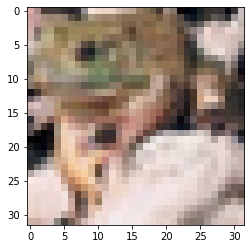

In [5]:
plt.imshow((X_train[97].astype(np.uint8)/255).reshape((3,32,32)).transpose(1,2,0))

In [16]:
class cifar10_dataset(Dataset):
    X=y=l=0
    def __init__(self,X,y):
        self.l=X.shape[0]
        self.X=torch.from_numpy(X).cuda()
        self.y=torch.LongTensor(y).cuda()
    def __len__(self):
        return self.l
    def __getitem__(self,i):
        return self.X[i],self.y[i]
def acc(y_true,y_preds):
    y_preds=torch.argmax(y_preds,dim=1).squeeze()
    return (y_true==y_preds).sum().item()/len(y_true)  

# def train(cnn,train_data,epochs,opt,loss,X_test,y_test,t):
#     tcounter=0
#     th=time()
# #     losses=[]
# #     accuracies=[]
#     a=0
#     amax=0
#     t+=time()-th
#     for i in range(epochs):
#         th=time()
#         l=0
#         t+=time()-th
#         for j,(X,y) in enumerate(train_data):
#             th=time()    
#             #print(X.shape,y.shape,type(X),type(y))
#             yh=cnn(X)
#             train_loss=loss(yh,y)
#             opt.zero_grad()
#             l+=train_loss.item()
#             train_loss.backward()
#             opt.step()
#             t+=time()-th
#         th=time()
        
#         with torch.no_grad():
# #             losses.append(l)
#             l/=len(train_data) 
#             y_preds=cnn(X_test)
#             a=acc(y_test,y_preds)
# #             accuracies.append()
#             print("Epoch: "+str(i+1)+" Train loss: "+str(l)+" test accuracy: " +str(a))  
#             t+=time()-th
#             th=time()
#         if((t>0 and a>amax)):
#             amax=a
#             #torch.save(cnn.state_dict(),'./model.pth')
#         t+=time()-th
#         if(t>10*60):
#             return amax
            
#     return amax 

In [13]:
def train(cnn,train_data,epochs,opt,loss,test_data,n,t):
    tcounter=0
    th=time()
#     losses=[]
#     accuracies=[]
    a=0
    amax=0
    t+=time()-th
    for i in range(epochs):
        th=time()
        l=0
        t+=time()-th
        for j,(X,y) in enumerate(train_data):
            th=time()    
            #print(X.shape,y.shape,type(X),type(y))
            yh=cnn(X.cuda())
            train_loss=loss(yh,y.type(torch.LongTensor).cuda())
            opt.zero_grad()
            l+=train_loss.item()
            train_loss.backward()
            opt.step()
            t+=time()-th
        th=time()
        
        with torch.no_grad():
#             losses.append(l)
            l/=len(train_data) 
            a=0
            for k,(X,y) in enumerate(test_data):
                y_preds=cnn(X.cuda())
                y_preds=torch.argmax(y_preds,dim=1).squeeze()
                a+=(y.cuda()==y_preds).sum().item()
            a/=n
#             ac=0
#             for k,(X,y) in enumerate(test):
#                 y_preds=cnn(X)
#                 y_preds=torch.argmax(y_preds,dim=1).squeeze()
#                 ac+=(y==y_preds).sum().item()
#             ac/=n    
#            accuracies.append()
            print("Epoch: "+str(i+1)+" Train loss: "+str(l)+" test accuracy: " +str(a))  
            t+=time()-th
            th=time()
            if((t>0 and a>amax)):
                amax=a
                #torch.save(cnn.state_dict(),'./model.pth')
            t+=time()-th
        if(t>10*60):
            return amax
            
    return amax 

# TESTING DIFFERENT PREPROCESSING CODES

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,512,3)
        self.bn3=nn.BatchNorm2d(512)
        self.c4=nn.Conv2d(512,1024,2)
        self.fc1=nn.Linear(1024,256)
        self.fc2=nn.Linear(256,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p2(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,1024)
        X=self.fc2(self.dropout(F.relu(self.fc1(X))))
        return X



In [23]:
class cifar10_dataset(Dataset):
    X=y=l=0
    def __init__(self,X,y):
        self.l=X.shape[0]
        self.X=torch.from_numpy(X)
        self.y=torch.LongTensor(y)
    def __len__(self):
        return self.l
    def __getitem__(self,i):
        return self.X[i],self.y[i]
    
X_train=pd.read_csv('cifar10_data/train_data.csv',header=None)
X_test=pd.read_csv('cifar10_data/public_test.csv',header=None)
X_train,y_train=X_train.iloc[:,1:].to_numpy().astype(np.float32),X_train.iloc[:,0].to_numpy().astype(np.float32)
X_test,y_test=X_test.iloc[:,1:].to_numpy().astype(np.float32),X_test.iloc[:,0].to_numpy().astype(np.float32)
X_train,X_test=X_train.reshape((-1,3,32,32)),X_test.reshape((-1,3,32,32))
X_train.shape,y_train.shape,X_test.shape,y_test.shape
bs=200
train_data=DataLoader(cifar10_dataset(X_train,y_train),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
test_data=DataLoader(cifar10_dataset(X_test,y_test),batch_size=bs,shuffle=False,num_workers=0)
# #X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
# # X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
# test=DataLoader(cifar10_dataset(X_test,y_test),batch_size=200,shuffle=False)

cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()

In [24]:
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,10)

Epoch: 1 Train loss: 1.4583529567718505 test accuracy: 0.5765
Epoch: 2 Train loss: 1.0740951937437058 test accuracy: 0.643
Epoch: 3 Train loss: 0.9122755732138952 test accuracy: 0.65875
Epoch: 4 Train loss: 0.7874665158987045 test accuracy: 0.676
Epoch: 5 Train loss: 0.674628387093544 test accuracy: 0.68525
Epoch: 6 Train loss: 0.5746658616264662 test accuracy: 0.685
Epoch: 7 Train loss: 0.4847498751680056 test accuracy: 0.68625
Epoch: 8 Train loss: 0.40390435556570686 test accuracy: 0.684
Epoch: 9 Train loss: 0.3342757673561573 test accuracy: 0.69025
Epoch: 10 Train loss: 0.28040341605742775 test accuracy: 0.687
Epoch: 11 Train loss: 0.24272904222210248 test accuracy: 0.686
Epoch: 12 Train loss: 0.21280323637028536 test accuracy: 0.693
Epoch: 13 Train loss: 0.19179743881026903 test accuracy: 0.676
Epoch: 14 Train loss: 0.17191277749836445 test accuracy: 0.6835
Epoch: 15 Train loss: 0.16067721882214148 test accuracy: 0.69925
Epoch: 16 Train loss: 0.15061305183917284 test accuracy: 0.67

0.70975

In [25]:
# class cifar10_dataset(Dataset):
#     X=y=l=0
#     def __init__(self,X,y):
#         self.l=X.shape[0]
#         self.X=torch.from_numpy(X).cuda()
#         self.y=torch.LongTensor(y).cuda()
#     def __len__(self):
#         return self.l
#     def __getitem__(self,i):
#         return self.X[i],self.y[i]
class cifar10_dataset(Dataset):    
    def __init__(self,data,train = True,img_transform=None):
        self.img_transform = img_transform
        self.is_train = train   
#         data = pd.read_csv(data_csv, header=None)
        if self.is_train:
            self.images,self.labels=data[0],data[1]            
#             images = data.iloc[:,1:].to_numpy()
#             labels = data.iloc[:,0].astype(int)
        else:
            self.images=data
#             images = data.iloc[:,:]
#             labels = None  
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,i):
        image = self.images[i]
        image = np.array(image).astype(np.uint8).reshape((32, 32, 3),order='F')
        if self.is_train:
            label = self.labels[i]
        else:
            label = -1
        image = self.img_transform(image)
        return image,label
    
X_train=pd.read_csv('cifar10_data/train_data.csv',header=None)
X_test=pd.read_csv('cifar10_data/public_test.csv',header=None)
# X_train,y_train=X_train.iloc[:,1:].to_numpy(),X_train.iloc[:,0].to_numpy().astype(int)
# X_test,y_test=X_test.iloc[:,1:].to_numpy(),X_test.iloc[:,0].to_numpy().astype(int)
X_train,y_train=np.array(X_train.iloc[:,1:],dtype=np.uint8),np.array(X_train.iloc[:,0],dtype=int)
X_test,y_test=np.array(X_test.iloc[:,1:],dtype=np.uint8),np.array(X_test.iloc[:,0],dtype=int)

#X_train,X_test=X_train.reshape((-1,3,32,32)),X_test.reshape((-1,3,32,32))
X_train.shape,y_train.shape,X_test.shape,y_test.shape
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()]  )                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
# #X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
# # X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
# test=DataLoader(cifar10_dataset(X_test,y_test),batch_size=200,shuffle=False)

cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()

In [26]:
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,10)

Epoch: 1 Train loss: 1.4582800833384195 test accuracy: 0.57725
Epoch: 2 Train loss: 1.0738604845603308 test accuracy: 0.64075
Epoch: 3 Train loss: 0.9085040332873663 test accuracy: 0.66725
Epoch: 4 Train loss: 0.7823814008633295 test accuracy: 0.68525
Epoch: 5 Train loss: 0.6746595605214437 test accuracy: 0.69725
Epoch: 6 Train loss: 0.5750470388929049 test accuracy: 0.70525
Epoch: 7 Train loss: 0.4831218994657199 test accuracy: 0.708
Epoch: 8 Train loss: 0.4007604005932808 test accuracy: 0.706
Epoch: 9 Train loss: 0.3329774000744025 test accuracy: 0.69825
Epoch: 10 Train loss: 0.27348528360327085 test accuracy: 0.68475
Epoch: 11 Train loss: 0.2461324534813563 test accuracy: 0.7015
Epoch: 12 Train loss: 0.23460144569476446 test accuracy: 0.7035
Epoch: 13 Train loss: 0.21269343324005605 test accuracy: 0.6935
Epoch: 14 Train loss: 0.18779620982706546 test accuracy: 0.68325
Epoch: 15 Train loss: 0.1632710656026999 test accuracy: 0.682
Epoch: 16 Train loss: 0.13911446766306956 test accurac

0.71425

In [2]:
class cifar10_dataset(Dataset):    
    def __init__(self,data,train = True,img_transform=None):
        self.img_transform = img_transform
        self.is_train = train   
#         data = pd.read_csv(data_csv, header=None)
        if self.is_train:
            self.images,self.labels=data[0],data[1]            
#             images = data.iloc[:,1:].to_numpy()
#             labels = data.iloc[:,0].astype(int)
        else:
            self.images=data
#             images = data.iloc[:,:]
#             labels = None  
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,i):
        image = self.images[i]
        #image = np.array(image).astype(np.uint8).reshape((32, 32, 3),order='F')
        if self.is_train:
            label = self.labels[i]
        else:
            label = -1
        image = self.img_transform(image)
        return image,label
    
X_train=pd.read_csv('cifar10_data/train_data.csv',header=None)
X_test=pd.read_csv('cifar10_data/public_test.csv',header=None)
X_train,y_train=np.array(X_train.iloc[:,1:],dtype=np.uint8),np.array(X_train.iloc[:,0],dtype=int)
X_test,y_test=np.array(X_test.iloc[:,1:],dtype=np.uint8),np.array(X_test.iloc[:,0],dtype=int)
X_train,X_test=X_train.reshape((-1,3,32,32)).transpose(0,2,3,1),X_test.reshape((-1,3,32,32)).transpose(0,2,3,1)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 32, 32, 3), (60000,), (4000, 32, 32, 3), (4000,))

In [27]:

bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()]  )                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
# #X_test,y_test=torch.from_numpy(X_test).cuda(),torch.LongTensor(y_test).cuda()
# # X_train,y_train=torch.from_numpy(X_train).cuda(),torch.LongTensor(y_train).cuda()
# test=DataLoader(cifar10_dataset(X_test,y_test),batch_size=200,shuffle=False)

cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()

In [28]:
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,10)

Epoch: 1 Train loss: 1.4368593700726826 test accuracy: 0.58375
Epoch: 2 Train loss: 1.0585507303476334 test accuracy: 0.63725
Epoch: 3 Train loss: 0.8894233570496242 test accuracy: 0.66175
Epoch: 4 Train loss: 0.7606638060013453 test accuracy: 0.68175
Epoch: 5 Train loss: 0.6491920384764671 test accuracy: 0.6965
Epoch: 6 Train loss: 0.5478086313605308 test accuracy: 0.6945
Epoch: 7 Train loss: 0.45520499378442764 test accuracy: 0.70475
Epoch: 8 Train loss: 0.375292926132679 test accuracy: 0.701
Epoch: 9 Train loss: 0.31461823229988417 test accuracy: 0.6915
Epoch: 10 Train loss: 0.2613475757837296 test accuracy: 0.68125
Epoch: 11 Train loss: 0.23292541240652404 test accuracy: 0.67975
Epoch: 12 Train loss: 0.22155862274269264 test accuracy: 0.66825
Epoch: 13 Train loss: 0.21243215362230936 test accuracy: 0.692
Epoch: 14 Train loss: 0.17121706686913968 test accuracy: 0.68975
Epoch: 15 Train loss: 0.12759359973172346 test accuracy: 0.6955
Epoch: 16 Train loss: 0.10902978758017222 test accu

0.7055

In [63]:
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,10)

Epoch: 1 Train loss: 1.5106280533472698 test accuracy: 0.5435
Epoch: 2 Train loss: 1.1362868694464365 test accuracy: 0.6165
Epoch: 3 Train loss: 0.9721474047501882 test accuracy: 0.64975
Epoch: 4 Train loss: 0.8506886422634125 test accuracy: 0.66925
Epoch: 5 Train loss: 0.7459475209315618 test accuracy: 0.68375
Epoch: 6 Train loss: 0.6494903988639513 test accuracy: 0.694
Epoch: 7 Train loss: 0.5651257514953614 test accuracy: 0.6995
Epoch: 8 Train loss: 0.4849318284789721 test accuracy: 0.70075
Epoch: 9 Train loss: 0.4117158429821332 test accuracy: 0.702
Epoch: 10 Train loss: 0.3456249438226223 test accuracy: 0.70525
Epoch: 11 Train loss: 0.28842060223221777 test accuracy: 0.69925
Epoch: 12 Train loss: 0.2430620046456655 test accuracy: 0.704
Epoch: 13 Train loss: 0.21111059551437697 test accuracy: 0.68325
Epoch: 14 Train loss: 0.20083301998674868 test accuracy: 0.676
Epoch: 15 Train loss: 0.19370142752925554 test accuracy: 0.6805
Epoch: 16 Train loss: 0.16502976797521116 test accuracy: 

0.71275

In [3]:
def train(cnn,train_data,epochs,opt,loss,test_data,n,b,t):
    tcounter=0
    th=time()
#     losses=[]
#     accuracies=[]
    a=0
    amax=0
    t+=time()-th
    for i in range(epochs):
        th=time()
        l=0
        for j,(X,y) in enumerate(train_data):
                
            #print(X.shape,y.shape,type(X),type(y))
            yh=cnn(X.cuda())
            train_loss=loss(yh,y.type(torch.LongTensor).cuda())
            opt.zero_grad()
            l+=train_loss.item()
            train_loss.backward()
            opt.step()
        t+=time()-th
        th=time()
        
        with torch.no_grad():
#             losses.append(l)
            l/=len(train_data) 
            a=0
            for k,(X,y) in enumerate(test_data):
                y_preds=cnn(X.cuda())
                y_preds=torch.argmax(y_preds,dim=1).squeeze()
                a+=(y.cuda()==y_preds).sum().item()
            a/=n
#             ac=0
#             for k,(X,y) in enumerate(test):
#                 y_preds=cnn(X)
#                 y_preds=torch.argmax(y_preds,dim=1).squeeze()
#                 ac+=(y==y_preds).sum().item()
#             ac/=n    
#            accuracies.append()
            t+=time()-th
            th=time()
            print("Epoch: "+str(i+1)+" Train loss: "+str(l)+" test accuracy: " +str(a)+" time: "+str(t))  
            if((t>0 and a>amax)):
                amax=a
                #torch.save(cnn.state_dict(),'./model.pth')
            t+=time()-th
        if(t>b*60):
            return amax
            
    return amax 

In [30]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.4791285308202107 test accuracy: 0.57375
Epoch: 2 Train loss: 1.138863796989123 test accuracy: 0.6255
Epoch: 3 Train loss: 1.0089709442853927 test accuracy: 0.66525
Epoch: 4 Train loss: 0.9193498277664185 test accuracy: 0.672
Epoch: 5 Train loss: 0.8530985208352407 test accuracy: 0.68775
Epoch: 6 Train loss: 0.7930918898185094 test accuracy: 0.70675
Epoch: 7 Train loss: 0.7401097889741262 test accuracy: 0.713
Epoch: 8 Train loss: 0.697019768555959 test accuracy: 0.72775
Epoch: 9 Train loss: 0.6590139192342758 test accuracy: 0.7255
Epoch: 10 Train loss: 0.6256713570157687 test accuracy: 0.7365
Epoch: 11 Train loss: 0.5912368218104045 test accuracy: 0.73425
Epoch: 12 Train loss: 0.5560082403818766 test accuracy: 0.7415
Epoch: 13 Train loss: 0.5299967016776402 test accuracy: 0.741
Epoch: 14 Train loss: 0.5042611532409986 test accuracy: 0.739
Epoch: 15 Train loss: 0.47668815424044925 test accuracy: 0.752
Epoch: 16 Train loss: 0.45920849571625394 test accuracy: 0.753
E

0.79325

In [31]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.3365628174940745 test accuracy: 0.64475
Epoch: 2 Train loss: 0.9597099647919337 test accuracy: 0.6855
Epoch: 3 Train loss: 0.8119729803005854 test accuracy: 0.733
Epoch: 4 Train loss: 0.7026382486025492 test accuracy: 0.74275
Epoch: 5 Train loss: 0.628559831182162 test accuracy: 0.756
Epoch: 6 Train loss: 0.572629913687706 test accuracy: 0.759
Epoch: 7 Train loss: 0.5234321040908495 test accuracy: 0.76825
Epoch: 8 Train loss: 0.4759476273258527 test accuracy: 0.76975
Epoch: 9 Train loss: 0.44751542071501416 test accuracy: 0.78
Epoch: 10 Train loss: 0.41567339112361273 test accuracy: 0.784
Epoch: 11 Train loss: 0.383553538719813 test accuracy: 0.78175
Epoch: 12 Train loss: 0.3633268170058727 test accuracy: 0.79
Epoch: 13 Train loss: 0.33663046757380166 test accuracy: 0.7865
Epoch: 14 Train loss: 0.31258124589920044 test accuracy: 0.78775
Epoch: 15 Train loss: 0.292830065091451 test accuracy: 0.795
Epoch: 16 Train loss: 0.275471866329511 test accuracy: 0.79975
Epoc

0.832

In [32]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.5362402975559235 test accuracy: 0.55875
Epoch: 2 Train loss: 1.195812590122223 test accuracy: 0.63175
Epoch: 3 Train loss: 1.0665685979525248 test accuracy: 0.6645
Epoch: 4 Train loss: 0.9783242696523666 test accuracy: 0.68425
Epoch: 5 Train loss: 0.9158724635839463 test accuracy: 0.70275
Epoch: 6 Train loss: 0.8647970634698868 test accuracy: 0.70725
Epoch: 7 Train loss: 0.8238718944787979 test accuracy: 0.7145
Epoch: 8 Train loss: 0.7781943696737289 test accuracy: 0.717
Epoch: 9 Train loss: 0.7504495282967886 test accuracy: 0.7355
Epoch: 10 Train loss: 0.7125309226910274 test accuracy: 0.7375
Epoch: 11 Train loss: 0.683325301706791 test accuracy: 0.74825
Epoch: 12 Train loss: 0.657204718987147 test accuracy: 0.75525
Epoch: 13 Train loss: 0.6371838546792666 test accuracy: 0.7525
Epoch: 14 Train loss: 0.610690900584062 test accuracy: 0.75325
Epoch: 15 Train loss: 0.5876956505576769 test accuracy: 0.77025
Epoch: 16 Train loss: 0.5673097996910413 test accuracy: 0.76

0.79825

In [33]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(45),
                                    transforms.RandomAffine(0,translate=(.5,.5))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.8458565433820089 test accuracy: 0.45575
Epoch: 2 Train loss: 1.6181017390886943 test accuracy: 0.522
Epoch: 3 Train loss: 1.5159276096026102 test accuracy: 0.55275
Epoch: 4 Train loss: 1.448677495320638 test accuracy: 0.562
Epoch: 5 Train loss: 1.3931771930058796 test accuracy: 0.58225
Epoch: 6 Train loss: 1.352813413143158 test accuracy: 0.5915
Epoch: 7 Train loss: 1.319721027612686 test accuracy: 0.603
Epoch: 8 Train loss: 1.2829634670416514 test accuracy: 0.6075
Epoch: 9 Train loss: 1.257999189297358 test accuracy: 0.6135
Epoch: 10 Train loss: 1.2306222816308339 test accuracy: 0.617
Epoch: 11 Train loss: 1.2142322518428166 test accuracy: 0.63175
Epoch: 12 Train loss: 1.1893927264213562 test accuracy: 0.63825
Epoch: 13 Train loss: 1.161974161863327 test accuracy: 0.64175
Epoch: 14 Train loss: 1.1451287770271301 test accuracy: 0.64275
Epoch: 15 Train loss: 1.126673681139946 test accuracy: 0.643
Epoch: 16 Train loss: 1.1152107614278792 test accuracy: 0.64825
Epoc

0.73325

In [34]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(10),
                                    transforms.RandomAffine(0,translate=(.2,.2))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.5883764346440634 test accuracy: 0.54225
Epoch: 2 Train loss: 1.2746693714459738 test accuracy: 0.614
Epoch: 3 Train loss: 1.1581920530398686 test accuracy: 0.6295
Epoch: 4 Train loss: 1.0815490021308263 test accuracy: 0.65375
Epoch: 5 Train loss: 1.011561239361763 test accuracy: 0.67125
Epoch: 6 Train loss: 0.9582570962111155 test accuracy: 0.68575
Epoch: 7 Train loss: 0.9112810371319453 test accuracy: 0.69875
Epoch: 8 Train loss: 0.8741180471579234 test accuracy: 0.704
Epoch: 9 Train loss: 0.8375645039478937 test accuracy: 0.712
Epoch: 10 Train loss: 0.8005728326241175 test accuracy: 0.726
Epoch: 11 Train loss: 0.773664763768514 test accuracy: 0.7315
Epoch: 12 Train loss: 0.7436660017569859 test accuracy: 0.73075
Epoch: 13 Train loss: 0.7250090118249257 test accuracy: 0.737
Epoch: 14 Train loss: 0.703873139222463 test accuracy: 0.74175
Epoch: 15 Train loss: 0.6788691352804502 test accuracy: 0.74425
Epoch: 16 Train loss: 0.6549577588836352 test accuracy: 0.751
Ep

0.7995

In [35]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomVerticalFlip(),
                                    transforms.ColorJitter(.1,.1,.1,.1)                                 
                                    ]),transforms.ToTensor()])
                                   
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.5316474243005116 test accuracy: 0.56375
Epoch: 2 Train loss: 1.2001941517988841 test accuracy: 0.632
Epoch: 3 Train loss: 1.0724805591503779 test accuracy: 0.66125
Epoch: 4 Train loss: 0.9807864946126937 test accuracy: 0.68525
Epoch: 5 Train loss: 0.9121509255965551 test accuracy: 0.69225
Epoch: 6 Train loss: 0.8563719469308854 test accuracy: 0.71575
Epoch: 7 Train loss: 0.8053501409292221 test accuracy: 0.72075
Epoch: 8 Train loss: 0.7604859296480815 test accuracy: 0.71725
Epoch: 9 Train loss: 0.7173475756247838 test accuracy: 0.732
Epoch: 10 Train loss: 0.6825959210594496 test accuracy: 0.732
Epoch: 11 Train loss: 0.6463489691416423 test accuracy: 0.739
Epoch: 12 Train loss: 0.6168507223327955 test accuracy: 0.736
Epoch: 13 Train loss: 0.5881875465313594 test accuracy: 0.7455
Epoch: 14 Train loss: 0.5617748008171717 test accuracy: 0.74475
Epoch: 15 Train loss: 0.5423966286579768 test accuracy: 0.74925
Epoch: 16 Train loss: 0.5219365414977074 test accuracy: 0.74

0.7725

In [75]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomVerticalFlip(),
                                    transforms.ColorJitter(.1,.1,.1,.1)                                 
                                    ]),transforms.ToTensor()])
                                   
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.5929689224561054 test accuracy: 0.54425
Epoch: 2 Train loss: 1.2554393935203552 test accuracy: 0.613
Epoch: 3 Train loss: 1.123969785173734 test accuracy: 0.6505
Epoch: 4 Train loss: 1.0410797135035197 test accuracy: 0.65825
Epoch: 5 Train loss: 0.9682439255714417 test accuracy: 0.67375
Epoch: 6 Train loss: 0.9148829694588979 test accuracy: 0.685
Epoch: 7 Train loss: 0.8623027755816778 test accuracy: 0.701
Epoch: 8 Train loss: 0.8159777208169301 test accuracy: 0.7115
Epoch: 9 Train loss: 0.7798100165526072 test accuracy: 0.72325
Epoch: 10 Train loss: 0.7434915312131246 test accuracy: 0.716
Epoch: 11 Train loss: 0.7095279332002004 test accuracy: 0.72425
Epoch: 12 Train loss: 0.6824593282739322 test accuracy: 0.73325
Epoch: 13 Train loss: 0.650688408811887 test accuracy: 0.7365
Epoch: 14 Train loss: 0.6271319509545962 test accuracy: 0.74
Epoch: 15 Train loss: 0.6005726822217305 test accuracy: 0.74475
Epoch: 16 Train loss: 0.5780155084530513 test accuracy: 0.749
Epo

0.79825

In [37]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),                               
                                    transforms.ToTensor(),
                                   transforms.RandomErasing()])
                                   
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)    


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.6212873129049936 test accuracy: 0.55375
Epoch: 2 Train loss: 1.276105173031489 test accuracy: 0.6045
Epoch: 3 Train loss: 1.1363818037509918 test accuracy: 0.6365
Epoch: 4 Train loss: 1.0496725988388063 test accuracy: 0.65725
Epoch: 5 Train loss: 0.9742652634779613 test accuracy: 0.669
Epoch: 6 Train loss: 0.9137145392100017 test accuracy: 0.6835
Epoch: 7 Train loss: 0.8609927533070246 test accuracy: 0.69
Epoch: 8 Train loss: 0.8135087770223618 test accuracy: 0.69275
Epoch: 9 Train loss: 0.7656823732455571 test accuracy: 0.7005
Epoch: 10 Train loss: 0.7250172120332717 test accuracy: 0.71475
Epoch: 11 Train loss: 0.6880072471499443 test accuracy: 0.71875
Epoch: 12 Train loss: 0.6498067251841227 test accuracy: 0.72175
Epoch: 13 Train loss: 0.6158524353305499 test accuracy: 0.71725
Epoch: 14 Train loss: 0.5806658943494161 test accuracy: 0.72575
Epoch: 15 Train loss: 0.5561448423067729 test accuracy: 0.72925
Epoch: 16 Train loss: 0.5301192142566045 test accuracy: 0.7

KeyboardInterrupt: 

In [38]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),                               
                                    transforms.ToTensor(),
                                   transforms.Normalize([0,0,0],[1,1,1])])
                                   
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)    


Epoch: 1 Train loss: 1.4436044430732726 test accuracy: 0.57625
Epoch: 2 Train loss: 1.0514435815811156 test accuracy: 0.646
Epoch: 3 Train loss: 0.8785825900236766 test accuracy: 0.66975
Epoch: 4 Train loss: 0.7514605957269669 test accuracy: 0.68175
Epoch: 5 Train loss: 0.6383389148116112 test accuracy: 0.6965
Epoch: 6 Train loss: 0.5340346145629883 test accuracy: 0.6995
Epoch: 7 Train loss: 0.44014868130286533 test accuracy: 0.7015
Epoch: 8 Train loss: 0.36341391732295353 test accuracy: 0.70875
Epoch: 9 Train loss: 0.29465453694264093 test accuracy: 0.706
Epoch: 10 Train loss: 0.2490854666630427 test accuracy: 0.70425
Epoch: 11 Train loss: 0.2282127759108941 test accuracy: 0.68675
Epoch: 12 Train loss: 0.20369748259584108 test accuracy: 0.69275
Epoch: 13 Train loss: 0.17512628967563312 test accuracy: 0.70525
Epoch: 14 Train loss: 0.15597077531119188 test accuracy: 0.68975
Epoch: 15 Train loss: 0.14458562755336365 test accuracy: 0.67725
Epoch: 16 Train loss: 0.14603340795884528 test ac

Epoch: 128 Train loss: 0.005736733756105726 test accuracy: 0.71625
Epoch: 129 Train loss: 0.00975758524495177 test accuracy: 0.70875
Epoch: 130 Train loss: 0.009537823773061973 test accuracy: 0.7175
Epoch: 131 Train loss: 0.0068125844928241955 test accuracy: 0.71425
Epoch: 132 Train loss: 0.005549084893524802 test accuracy: 0.72775


KeyboardInterrupt: 

In [44]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0,0,0],[1,1,1])])                                   
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)    

Epoch: 1 Train loss: 1.4977054437001547 test accuracy: 0.5695 time: 39.48702073097229
Epoch: 2 Train loss: 1.1493236392736434 test accuracy: 0.626 time: 69.10966348648071
Epoch: 3 Train loss: 1.0201028162240982 test accuracy: 0.65225 time: 99.20093297958374
Epoch: 4 Train loss: 0.9305745544036229 test accuracy: 0.68575 time: 128.66833186149597
Epoch: 5 Train loss: 0.8596844871838888 test accuracy: 0.69675 time: 158.15997433662415
Epoch: 6 Train loss: 0.8037485049168269 test accuracy: 0.70825 time: 187.59843587875366
Epoch: 7 Train loss: 0.7520570824543635 test accuracy: 0.72075 time: 217.714768409729


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 8 Train loss: 0.7055864204963048 test accuracy: 0.72225 time: 247.51780319213867
Epoch: 9 Train loss: 0.6648671241601308 test accuracy: 0.73775 time: 276.98492217063904
Epoch: 10 Train loss: 0.6253752627968788 test accuracy: 0.73675 time: 306.3425147533417
Epoch: 11 Train loss: 0.59093371540308 test accuracy: 0.73325 time: 336.36740946769714
Epoch: 12 Train loss: 0.5620168121655782 test accuracy: 0.73325 time: 365.8326325416565
Epoch: 13 Train loss: 0.5299008946617444 test accuracy: 0.74525 time: 395.2275421619415
Epoch: 14 Train loss: 0.5075177260239919 test accuracy: 0.752 time: 424.61577105522156


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 15 Train loss: 0.48219981412092844 test accuracy: 0.74125 time: 454.68247985839844
Epoch: 16 Train loss: 0.461693067351977 test accuracy: 0.751 time: 484.06590723991394
Epoch: 17 Train loss: 0.43711158325274785 test accuracy: 0.74875 time: 513.4575991630554
Epoch: 18 Train loss: 0.42032947182655334 test accuracy: 0.7645 time: 542.807816028595
Epoch: 19 Train loss: 0.4019600468873978 test accuracy: 0.74675 time: 572.9186623096466
Epoch: 20 Train loss: 0.3819040235877037 test accuracy: 0.75525 time: 602.3002190589905
Epoch: 21 Train loss: 0.369445996483167 test accuracy: 0.75725 time: 631.6757373809814


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 22 Train loss: 0.359738820840915 test accuracy: 0.7575 time: 661.1725993156433
Epoch: 23 Train loss: 0.3422026188671589 test accuracy: 0.761 time: 691.1375470161438
Epoch: 24 Train loss: 0.32834473441044487 test accuracy: 0.764 time: 720.5332174301147
Epoch: 25 Train loss: 0.31725414857268336 test accuracy: 0.7615 time: 749.9365403652191
Epoch: 26 Train loss: 0.30416385864218076 test accuracy: 0.7745 time: 779.3349084854126
Epoch: 27 Train loss: 0.2938410727183024 test accuracy: 0.77025 time: 809.4435024261475
Epoch: 28 Train loss: 0.2845648516714573 test accuracy: 0.76825 time: 838.8449602127075


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 29 Train loss: 0.27835203369458517 test accuracy: 0.76825 time: 868.3051354885101
Epoch: 30 Train loss: 0.2635517611106237 test accuracy: 0.77 time: 897.6907787322998
Epoch: 31 Train loss: 0.25718472530444464 test accuracy: 0.768 time: 927.7054481506348
Epoch: 32 Train loss: 0.24996719732880593 test accuracy: 0.77775 time: 957.0389401912689
Epoch: 33 Train loss: 0.2430725461244583 test accuracy: 0.772 time: 986.3521220684052


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 34 Train loss: 0.23461695849895478 test accuracy: 0.77425 time: 1015.8334991931915
Epoch: 35 Train loss: 0.22713217129309973 test accuracy: 0.76625 time: 1045.9588844776154


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 36 Train loss: 0.21865922515590985 test accuracy: 0.768 time: 1075.4611268043518
Epoch: 37 Train loss: 0.21217367311318716 test accuracy: 0.77225 time: 1104.8783602714539
Epoch: 38 Train loss: 0.2056362572312355 test accuracy: 0.77875 time: 1134.3158013820648
Epoch: 39 Train loss: 0.20233263274033864 test accuracy: 0.77 time: 1164.3374316692352
Epoch: 40 Train loss: 0.1967469949275255 test accuracy: 0.7795 time: 1193.6502017974854


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 41 Train loss: 0.18652439897259077 test accuracy: 0.76825 time: 1223.1346771717072
Epoch: 42 Train loss: 0.18496758801241717 test accuracy: 0.774 time: 1252.8305118083954
Epoch: 43 Train loss: 0.18127009128530822 test accuracy: 0.77925 time: 1282.4199666976929
Epoch: 44 Train loss: 0.17630380099018414 test accuracy: 0.77225 time: 1312.2934219837189
Epoch: 45 Train loss: 0.16989522335429985 test accuracy: 0.777 time: 1341.967027425766
Epoch: 46 Train loss: 0.16602406593660513 test accuracy: 0.78225 time: 1371.7057211399078
Epoch: 47 Train loss: 0.16304934598505497 test accuracy: 0.78125 time: 1402.042465686798


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b81414f7670>
Traceback (most recent call last):
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 48 Train loss: 0.15998592399060726 test accuracy: 0.78425 time: 1431.8002316951752
Epoch: 49 Train loss: 0.15581695802509785 test accuracy: 0.7905 time: 1462.1450548171997
Epoch: 50 Train loss: 0.15232944541921217 test accuracy: 0.77625 time: 1492.0191547870636
Epoch: 51 Train loss: 0.1493382376929124 test accuracy: 0.78225 time: 1521.7087309360504


0.7905

In [46]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.AutoAugment(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0,0,0],[1,1,1])])                                   
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)   

Epoch: 1 Train loss: 1.799192054271698 test accuracy: 0.5455 time: 50.27506685256958
Epoch: 2 Train loss: 1.4686600840091706 test accuracy: 0.60175 time: 90.57878875732422
Epoch: 3 Train loss: 1.3512931140263875 test accuracy: 0.63325 time: 130.949387550354
Epoch: 4 Train loss: 1.2690032653013865 test accuracy: 0.6455 time: 172.05096077919006
Epoch: 5 Train loss: 1.1986507628361385 test accuracy: 0.6645 time: 212.1780149936676
Epoch: 6 Train loss: 1.1415375890334447 test accuracy: 0.674 time: 252.23282289505005
Epoch: 7 Train loss: 1.0891870256265004 test accuracy: 0.68275 time: 292.11539030075073
Epoch: 8 Train loss: 1.0424853853384655 test accuracy: 0.69275 time: 331.9574365615845
Epoch: 9 Train loss: 0.9997239585717519 test accuracy: 0.7035 time: 372.3929693698883
Epoch: 10 Train loss: 0.9605072369178136 test accuracy: 0.7185 time: 412.2611753940582
Epoch: 11 Train loss: 0.9288392406702042 test accuracy: 0.71675 time: 451.98407912254333
Epoch: 12 Train loss: 0.8958071718613306 test 

0.7555

In [49]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                   transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)), 
                                    transforms.ColorJitter(.1,.1,0,0)                                 
                                    ,transforms.ToTensor()])

train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)    

Epoch: 1 Train loss: 1.540492668946584 test accuracy: 0.55775 time: 58.081937313079834
Epoch: 2 Train loss: 1.2067346048355103 test accuracy: 0.63375 time: 105.57040882110596
Epoch: 3 Train loss: 1.082468300461769 test accuracy: 0.65975 time: 153.61708569526672
Epoch: 4 Train loss: 1.004332132935524 test accuracy: 0.6785 time: 200.97578024864197
Epoch: 5 Train loss: 0.9337979080279668 test accuracy: 0.70575 time: 248.31539392471313
Epoch: 6 Train loss: 0.8827671507994334 test accuracy: 0.71075 time: 295.73346185684204
Epoch: 7 Train loss: 0.8431127611796061 test accuracy: 0.708 time: 343.0912494659424
Epoch: 8 Train loss: 0.7996239743630091 test accuracy: 0.71675 time: 391.1371202468872
Epoch: 9 Train loss: 0.7666138780117034 test accuracy: 0.72875 time: 438.4712197780609
Epoch: 10 Train loss: 0.7345975397030512 test accuracy: 0.73625 time: 485.7498619556427
Epoch: 11 Train loss: 0.702104351023833 test accuracy: 0.73975 time: 532.8762364387512
Epoch: 12 Train loss: 0.6802355442444483 t

0.7895

In [51]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                   transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)), 
                                    transforms.RandomGrayscale(.05)
                                    ,transforms.ToTensor()])

train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)  

Epoch: 1 Train loss: 1.5566804929574332 test accuracy: 0.555 time: 41.58093309402466
Epoch: 2 Train loss: 1.217819416920344 test accuracy: 0.6115 time: 73.11767315864563
Epoch: 3 Train loss: 1.1004086842139562 test accuracy: 0.64925 time: 104.6369514465332
Epoch: 4 Train loss: 1.0124977497259775 test accuracy: 0.668 time: 136.2021141052246
Epoch: 5 Train loss: 0.9550197440385818 test accuracy: 0.685 time: 167.8355269432068
Epoch: 6 Train loss: 0.9026418370008469 test accuracy: 0.69325 time: 199.7764973640442
Epoch: 7 Train loss: 0.8627730284134547 test accuracy: 0.70675 time: 232.44542407989502
Epoch: 8 Train loss: 0.824023167292277 test accuracy: 0.72275 time: 264.349817276001
Epoch: 9 Train loss: 0.786134437918663 test accuracy: 0.7195 time: 296.2857747077942
Epoch: 10 Train loss: 0.7531578824917475 test accuracy: 0.74 time: 328.16941022872925
Epoch: 11 Train loss: 0.724064134756724 test accuracy: 0.7395 time: 360.08136439323425
Epoch: 12 Train loss: 0.7031170690059662 test accuracy:

0.79425

In [55]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
#                                    transforms.RandomRotation(5),
#                                     transforms.RandomAffine(0,translate=(.1,.1)), 
                                    transforms.RandomApply([transforms.GaussianBlur(5)],1)                                 
                                    ,transforms.ToTensor()])

train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)  

Epoch: 1 Train loss: 1.5577394604682921 test accuracy: 0.53225 time: 62.971163511276245
Epoch: 2 Train loss: 1.2461743927001954 test accuracy: 0.57975 time: 115.99799752235413
Epoch: 3 Train loss: 1.1061289032300314 test accuracy: 0.60125 time: 169.1418273448944
Epoch: 4 Train loss: 1.0034367501735688 test accuracy: 0.6215 time: 222.73021960258484
Epoch: 5 Train loss: 0.9177515701452891 test accuracy: 0.63525 time: 275.6442174911499
Epoch: 6 Train loss: 0.8461856172482173 test accuracy: 0.64925 time: 329.7745690345764
Epoch: 7 Train loss: 0.7720630804697672 test accuracy: 0.6595 time: 383.4400734901428
Epoch: 8 Train loss: 0.7069924851258595 test accuracy: 0.666 time: 437.80947637557983
Epoch: 9 Train loss: 0.646087683737278 test accuracy: 0.67075 time: 491.4178309440613
Epoch: 10 Train loss: 0.587795724272728 test accuracy: 0.67 time: 545.0422039031982
Epoch: 11 Train loss: 0.5308773323893548 test accuracy: 0.67225 time: 599.1467089653015
Epoch: 12 Train loss: 0.4811442560950915 test 

KeyboardInterrupt: 

In [ ]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                   transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)), 
                                    transforms.RandomApply([transforms.ColorJitter(.1,.1,0,0)],.1)                                 
                                    ,transforms.ToTensor()])

train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)  

In [9]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomCrop(32,1,True)
#                                    transforms.RandomRotation(5),
#                                     transforms.RandomAffine(0,translate=(.1,.1)), 
#                                     transforms.RandomApply([transforms.ColorJitter(.1,.1,0,0)],.1)                                 
                                    ,transforms.ToTensor()])

train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-4)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)  

Epoch: 1 Train loss: 1.4821476085980734 test accuracy: 0.562 time: 45.87855505943298
Epoch: 2 Train loss: 1.1432311753431956 test accuracy: 0.616 time: 78.9062397480011
Epoch: 3 Train loss: 1.0027479871114096 test accuracy: 0.65025 time: 114.89893174171448
Epoch: 4 Train loss: 0.9108185011148453 test accuracy: 0.6705 time: 151.5019724369049
Epoch: 5 Train loss: 0.8331673814853032 test accuracy: 0.68725 time: 186.0408856868744
Epoch: 6 Train loss: 0.7690029559532802 test accuracy: 0.6995 time: 223.33709478378296
Epoch: 7 Train loss: 0.7184927368164062 test accuracy: 0.71325 time: 259.0610320568085
Epoch: 8 Train loss: 0.6638700303435325 test accuracy: 0.71325 time: 296.24543738365173
Epoch: 9 Train loss: 0.6233581643303235 test accuracy: 0.724 time: 332.12297773361206
Epoch: 10 Train loss: 0.5796642801165581 test accuracy: 0.72775 time: 369.6432454586029
Epoch: 11 Train loss: 0.5392588152488073 test accuracy: 0.725 time: 407.1233060359955
Epoch: 12 Train loss: 0.508023444712162 test acc

0.77425

In [19]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.RandomApply([transforms.RandomCrop(32,1,True)],0.2),                                    
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.330652518471082 test accuracy: 0.63225 time: 68.06009197235107
Epoch: 2 Train loss: 0.946091268658638 test accuracy: 0.70975 time: 125.25888156890869
Epoch: 3 Train loss: 0.7938787633180618 test accuracy: 0.74475 time: 184.6778666973114
Epoch: 4 Train loss: 0.691278994679451 test accuracy: 0.75875 time: 243.94431853294373
Epoch: 5 Train loss: 0.6182808873057365 test accuracy: 0.75625 time: 301.09860157966614
Epoch: 6 Train loss: 0.569794067343076 test accuracy: 0.78075 time: 359.67694568634033
Epoch: 7 Train loss: 0.5163327479362487 test accuracy: 0.77775 time: 418.395653963089
Epoch: 8 Train loss: 0.47054280797640485 test accuracy: 0.783 time: 478.6303017139435
Epoch: 9 Train loss: 0.43693035433689753 test accuracy: 0.786 time: 537.8452634811401
Epoch: 10 Train loss: 0.40672569304704664 test accuracy: 0.799 time: 595.3987114429474
Epoch: 11 Train loss: 0.3775063062210878 test accuracy: 0.7855 time: 658.4365692138672
Epoch: 12 Train loss: 0.36325770924488704 test

0.8115

In [21]:
def weight_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight, gain=nn.init.calculate_gain('relu'))
        nn.init.zeros_(m.bias)

In [22]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(10),
                                    transforms.RandomAffine(0,translate=(.2,.2))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.4501807423432669 test accuracy: 0.61775 time: 61.401177644729614
Epoch: 2 Train loss: 1.086655056476593 test accuracy: 0.6765 time: 115.29822826385498
Epoch: 3 Train loss: 0.9482248840729396 test accuracy: 0.70925 time: 167.0893030166626
Epoch: 4 Train loss: 0.8503906927506129 test accuracy: 0.74125 time: 222.22696733474731
Epoch: 5 Train loss: 0.7764003326495489 test accuracy: 0.74375 time: 273.24004578590393
Epoch: 6 Train loss: 0.7233646064003308 test accuracy: 0.768 time: 325.96072936058044
Epoch: 7 Train loss: 0.6771003890037537 test accuracy: 0.77025 time: 377.9215531349182
Epoch: 8 Train loss: 0.6341239043076833 test accuracy: 0.785 time: 428.85303807258606
Epoch: 9 Train loss: 0.5991191790501277 test accuracy: 0.78225 time: 480.9408121109009
Epoch: 10 Train loss: 0.5683237891395887 test accuracy: 0.781 time: 533.0098042488098
Epoch: 11 Train loss: 0.5441146250565847 test accuracy: 0.788 time: 586.5214092731476
Epoch: 12 Train loss: 0.5169980430603027 test

0.811

In [23]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomRotation(10),
                                    transforms.RandomAffine(0,translate=(.2,.2)),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.5438231380780538 test accuracy: 0.564 time: 71.52702975273132
Epoch: 2 Train loss: 1.2171825989087424 test accuracy: 0.6345 time: 133.7003195285797
Epoch: 3 Train loss: 1.0881083005666732 test accuracy: 0.672 time: 195.05453824996948
Epoch: 4 Train loss: 0.9991550425688426 test accuracy: 0.704 time: 256.7860004901886
Epoch: 5 Train loss: 0.9243501255909602 test accuracy: 0.72525 time: 318.5083382129669
Epoch: 6 Train loss: 0.8709747594594955 test accuracy: 0.7415 time: 380.3237566947937
Epoch: 7 Train loss: 0.8340376337369283 test accuracy: 0.744 time: 441.8989362716675
Epoch: 8 Train loss: 0.7980590877930324 test accuracy: 0.75175 time: 503.83137369155884
Epoch: 9 Train loss: 0.7642764500776926 test accuracy: 0.7635 time: 565.0013794898987
Epoch: 10 Train loss: 0.7361879771947861 test accuracy: 0.7695 time: 627.6136972904205
Epoch: 11 Train loss: 0.7047495476404826 test accuracy: 0.76425 time: 688.1895406246185
Epoch: 12 Train loss: 0.6881149365504583 test accur

0.799

In [29]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomRotation(5),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.2607257012526194 test accuracy: 0.6465 time: 62.291348457336426
Epoch: 2 Train loss: 0.876192189057668 test accuracy: 0.69275 time: 113.59563970565796
Epoch: 3 Train loss: 0.7047317124406497 test accuracy: 0.72375 time: 166.29455995559692
Epoch: 4 Train loss: 0.5813896186153094 test accuracy: 0.734 time: 218.1548993587494
Epoch: 5 Train loss: 0.49829625884691875 test accuracy: 0.7285 time: 269.77325987815857
Epoch: 6 Train loss: 0.42566302796204886 test accuracy: 0.73975 time: 320.58992981910706
Epoch: 7 Train loss: 0.37264653260509173 test accuracy: 0.76075 time: 372.1278328895569
Epoch: 8 Train loss: 0.324858130166928 test accuracy: 0.75775 time: 423.34737372398376
Epoch: 9 Train loss: 0.27558774332205455 test accuracy: 0.75875 time: 474.15427350997925
Epoch: 10 Train loss: 0.2368324824422598 test accuracy: 0.7485 time: 525.2502524852753
Epoch: 11 Train loss: 0.20340011211733022 test accuracy: 0.752 time: 577.2802202701569
Epoch: 12 Train loss: 0.18680946437021

0.784

In [30]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.RandomAffine(0,translate=(.1,.1)),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.3541279500722885 test accuracy: 0.626 time: 64.4545087814331
Epoch: 2 Train loss: 0.9826176601648331 test accuracy: 0.68725 time: 118.56478643417358
Epoch: 3 Train loss: 0.834977111419042 test accuracy: 0.72225 time: 172.63995218276978
Epoch: 4 Train loss: 0.7375881854693095 test accuracy: 0.75225 time: 227.68949055671692
Epoch: 5 Train loss: 0.6677150547504425 test accuracy: 0.75575 time: 282.0405306816101
Epoch: 6 Train loss: 0.6138019302487373 test accuracy: 0.7745 time: 337.3197178840637
Epoch: 7 Train loss: 0.5728931172688803 test accuracy: 0.766 time: 391.59947752952576
Epoch: 8 Train loss: 0.5309883003433545 test accuracy: 0.7765 time: 446.08366107940674
Epoch: 9 Train loss: 0.4951628236969312 test accuracy: 0.78425 time: 501.0167911052704
Epoch: 10 Train loss: 0.460824199616909 test accuracy: 0.799 time: 554.5132377147675
Epoch: 11 Train loss: 0.4392235975464185 test accuracy: 0.78925 time: 610.1118433475494
Epoch: 12 Train loss: 0.40521724859873454 test 

0.81375

# TESTING DIFFERENT MODELS

In [28]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,512,3)
        self.bn3=nn.BatchNorm2d(512)
        self.c4=nn.Conv2d(512,1024,2)
        self.fc1=nn.Linear(1024,256)
        self.fc2=nn.Linear(256,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p2(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,1024)
        X=self.fc2(self.dropout(F.relu(self.fc1(X))))
        return X
sum(p.numel() for p in CNN().parameters())

2679178

In [13]:
# Deeper FCN
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3)
        self.bn1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3)
        self.bn2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,512,3)
        self.bn3=nn.BatchNorm2d(512)
        self.c4=nn.Conv2d(512,1024,2)
        self.fc1=nn.Linear(1024,256)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,10)
        self.fc4=nn.Linear(128,10)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn1(self.c1(X))))
        X=self.p2(F.relu(self.bn2(self.c2(X)))) 
        X=self.p2(F.relu(self.bn3(self.c3(X))))        
        X=F.relu(self.c4(X))
        X=X.view(-1,1024)
        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(F.relu(self.fc2(self.dropout(F.relu(self.fc1(X))))))))))
        return X
sum(p.numel() for p in CNN().parameters())
# a=CNN_B().cuda()
# b=cifar10_dataset(X_train,y_train)
# d=a.forward(b.__getitem__(0)[0].reshape(1,3,32,32))
# d.shape    

2812446

In [25]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)

Epoch: 1 Train loss: 1.335420708656311 test accuracy: 0.657 time: 64.7016110420227
Epoch: 2 Train loss: 0.9489365748564402 test accuracy: 0.7095 time: 119.74433255195618
Epoch: 3 Train loss: 0.7951028935114542 test accuracy: 0.7435 time: 175.04571342468262
Epoch: 4 Train loss: 0.6923758488893509 test accuracy: 0.757 time: 229.98001623153687
Epoch: 5 Train loss: 0.620520735780398 test accuracy: 0.7585 time: 283.7158000469208
Epoch: 6 Train loss: 0.5635943968097369 test accuracy: 0.77625 time: 338.94573736190796
Epoch: 7 Train loss: 0.5099677692850431 test accuracy: 0.77275 time: 393.17236161231995
Epoch: 8 Train loss: 0.4679200378060341 test accuracy: 0.78025 time: 448.07105827331543
Epoch: 9 Train loss: 0.4254749521613121 test accuracy: 0.7885 time: 501.9364025592804
Epoch: 10 Train loss: 0.3950006791949272 test accuracy: 0.79 time: 556.6523904800415
Epoch: 11 Train loss: 0.37624777292211853 test accuracy: 0.79275 time: 609.6299903392792
Epoch: 12 Train loss: 0.35083161110679306 test a

0.81825

In [40]:
#VGG Based
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')
        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        # self.c9=nn.Conv2d(256,512,3,padding='same')
        # self.c10=nn.Conv2d(512,1024,2)
        # self.bn5=nn.BatchNorm2d(512)
        # self.bn6=nn.BatchNorm2d(1024)
        self.fc1=nn.Linear(1024,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(F.relu(self.c2(F.relu(self.bn1(self.c1(X))))))))
        X=self.p2(F.relu(self.bn4(F.relu(self.c4(F.relu(self.bn3(self.c3(X))))))))
        X=self.p2(F.relu(self.bn6(F.relu(self.c6(F.relu(self.bn5(self.c5(X))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=self.p2(F.relu(self.bn8(F.relu(self.c8(F.relu(self.bn7(self.c7(X))))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,1024)       
        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(F.relu(self.fc2(self.dropout(F.relu(self.fc1(X))))))))))
        return X
    
sum(p.numel() for p in CNN().parameters())    

1872106

In [41]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)    

Epoch: 1 Train loss: 1.4562279752890268 test accuracy: 0.6255 time: 53.05144429206848
Epoch: 2 Train loss: 0.9249736978610357 test accuracy: 0.7085 time: 96.12781262397766
Epoch: 3 Train loss: 0.736960699558258 test accuracy: 0.7585 time: 139.15706515312195
Epoch: 4 Train loss: 0.6037033932407697 test accuracy: 0.7865 time: 182.08458375930786
Epoch: 5 Train loss: 0.5233810791373252 test accuracy: 0.79075 time: 225.45615482330322
Epoch: 6 Train loss: 0.45707995563745496 test accuracy: 0.80475 time: 268.60526943206787
Epoch: 7 Train loss: 0.4042119578023752 test accuracy: 0.82225 time: 311.54846143722534
Epoch: 8 Train loss: 0.36224018012483916 test accuracy: 0.825 time: 354.69612884521484
Epoch: 9 Train loss: 0.3242809188365936 test accuracy: 0.83025 time: 398.2312729358673
Epoch: 10 Train loss: 0.2971658101677895 test accuracy: 0.829 time: 441.4491147994995
Epoch: 11 Train loss: 0.2672389254470666 test accuracy: 0.832 time: 484.6292142868042
Epoch: 12 Train loss: 0.24958608190218606 te

0.8525

In [44]:
#VGG Based, correct order of bn, relu
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')
        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        # self.c9=nn.Conv2d(256,512,3,padding='same')
        # self.c10=nn.Conv2d(512,1024,2)
        # self.bn5=nn.BatchNorm2d(512)
        # self.bn6=nn.BatchNorm2d(1024)
        self.fc1=nn.Linear(1024,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p2(F.relu(self.bn4(self.c4(F.relu(self.bn3(self.c3(X)))))))
        X=self.p2(F.relu(self.bn6(self.c6(F.relu(self.bn5(self.c5(X)))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=self.p2(F.relu(self.bn8(self.c8(F.relu(self.bn7(self.c7(X)))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,1024)       
        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(F.relu(self.fc2(self.dropout(F.relu(self.fc1(X))))))))))
        return X
    
sum(p.numel() for p in CNN().parameters())   

1872106

In [45]:
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)   

Epoch: 1 Train loss: 1.4404330583413443 test accuracy: 0.624 time: 52.78881597518921
Epoch: 2 Train loss: 0.9511392949024836 test accuracy: 0.719 time: 95.70484709739685
Epoch: 3 Train loss: 0.7489076014359792 test accuracy: 0.761 time: 138.5812644958496
Epoch: 4 Train loss: 0.6296023226777713 test accuracy: 0.7915 time: 181.59400153160095
Epoch: 5 Train loss: 0.537713716129462 test accuracy: 0.80675 time: 224.78408002853394
Epoch: 6 Train loss: 0.47038890759150187 test accuracy: 0.81975 time: 267.68390369415283
Epoch: 7 Train loss: 0.42250141441822053 test accuracy: 0.82175 time: 310.8067774772644
Epoch: 8 Train loss: 0.38065199568867686 test accuracy: 0.8315 time: 353.88093852996826
Epoch: 9 Train loss: 0.3404747254649798 test accuracy: 0.834 time: 397.0957248210907
Epoch: 10 Train loss: 0.3098311799764633 test accuracy: 0.835 time: 439.9985888004303
Epoch: 11 Train loss: 0.2794028079509735 test accuracy: 0.84225 time: 483.28748631477356
Epoch: 12 Train loss: 0.254479819710056 test a

0.8635

In [46]:
# Removed final pooling layer
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(F.relu(self.c2(F.relu(self.bn1(self.c1(X))))))))
        X=self.p2(F.relu(self.bn4(F.relu(self.c4(F.relu(self.bn3(self.c3(X))))))))
        X=self.p2(F.relu(self.bn6(F.relu(self.c6(F.relu(self.bn5(self.c5(X))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn8(F.relu(self.c8(F.relu(self.bn7(self.c7(X)))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
        

2264810
Epoch: 1 Train loss: 1.3836492721239726 test accuracy: 0.6425 time: 53.574042081832886
Epoch: 2 Train loss: 0.9005601340532303 test accuracy: 0.74 time: 96.77295732498169
Epoch: 3 Train loss: 0.7055519510308902 test accuracy: 0.7575 time: 140.2084231376648
Epoch: 4 Train loss: 0.5819109463691712 test accuracy: 0.79625 time: 183.5829417705536
Epoch: 5 Train loss: 0.5012856873869896 test accuracy: 0.80325 time: 226.94815230369568
Epoch: 6 Train loss: 0.4329609106977781 test accuracy: 0.81225 time: 270.28664684295654
Epoch: 7 Train loss: 0.38140664239724476 test accuracy: 0.8195 time: 313.3133637905121
Epoch: 8 Train loss: 0.3419881337384383 test accuracy: 0.821 time: 356.44992423057556
Epoch: 9 Train loss: 0.3066712711751461 test accuracy: 0.8305 time: 399.6552233695984
Epoch: 10 Train loss: 0.272561580290397 test accuracy: 0.832 time: 443.0736343860626
Epoch: 11 Train loss: 0.244205112606287 test accuracy: 0.8305 time: 486.40055108070374
Epoch: 12 Train loss: 0.22509667135775088

Exception ignored in: Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2b6c62d78670><function _MultiProcessingDataLoaderIter.__del__ at 0x2b6c62d78670><function _MultiProcessingDataLoaderIter.__del__ at 0x2b6c62d78670>


Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Exception ignored in:   File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x2b6c62d78670>
Traceback (most recent call last):
Exception ignored in: Exception ignored in:   File "/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/tor

Epoch: 34 Train loss: 0.06890524767339229 test accuracy: 0.8495 time: 1483.582394361496
Epoch: 35 Train loss: 0.06898250001172225 test accuracy: 0.853 time: 1526.9416267871857


0.855

In [39]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(F.relu(self.c2(F.relu(self.bn1(self.c1(X))))))))
        X=self.p2(F.relu(self.bn4(F.relu(self.c4(F.relu(self.bn3(self.c3(X))))))))
        X=self.p2(F.relu(self.bn6(F.relu(self.c6(F.relu(self.bn5(self.c5(X))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn8(F.relu(self.c8(F.relu(self.bn7(self.c7(X)))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
        

Epoch: 1 Train loss: 1.345347482363383 test accuracy: 0.6485 time: 52.9421911239624
Epoch: 2 Train loss: 0.862149597009023 test accuracy: 0.7415 time: 96.66772389411926
Epoch: 3 Train loss: 0.6714612422386805 test accuracy: 0.779 time: 140.1503643989563
Epoch: 4 Train loss: 0.5619830100735028 test accuracy: 0.807 time: 183.54303765296936
Epoch: 5 Train loss: 0.48865325113137564 test accuracy: 0.8085 time: 226.6786425113678
Epoch: 6 Train loss: 0.4285627185801665 test accuracy: 0.8155 time: 269.8924353122711
Epoch: 7 Train loss: 0.3773352071642876 test accuracy: 0.83075 time: 313.30586075782776
Epoch: 8 Train loss: 0.33936522737145425 test accuracy: 0.8305 time: 356.7460973262787
Epoch: 9 Train loss: 0.2996366846561432 test accuracy: 0.8385 time: 399.78175044059753
Epoch: 10 Train loss: 0.27194959272940955 test accuracy: 0.84425 time: 442.8702836036682
Epoch: 11 Train loss: 0.24904472703735034 test accuracy: 0.837 time: 486.4328739643097
Epoch: 12 Train loss: 0.22528924018144608 test ac

0.86325

In [47]:
#correct order of bn, relu, without final pooling layer
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p2(F.relu(self.bn4(self.c4(F.relu(self.bn3(self.c3(X)))))))
        X=self.p2(F.relu(self.bn6(self.c6(F.relu(self.bn5(self.c5(X)))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn8(self.c8(F.relu(self.bn7(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X

print(sum(p.numel() for p in CNN().parameters()))         
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)  

2559850
Epoch: 1 Train loss: 1.3724033675591152 test accuracy: 0.6425 time: 52.77963733673096
Epoch: 2 Train loss: 0.8976599357525508 test accuracy: 0.736 time: 95.84326481819153
Epoch: 3 Train loss: 0.7103493789831797 test accuracy: 0.77325 time: 138.62260460853577
Epoch: 4 Train loss: 0.6016502231359482 test accuracy: 0.8005 time: 181.58708572387695
Epoch: 5 Train loss: 0.5214641544222832 test accuracy: 0.80425 time: 224.42731142044067
Epoch: 6 Train loss: 0.4608692462245623 test accuracy: 0.803 time: 267.6542818546295
Epoch: 7 Train loss: 0.42120756988724073 test accuracy: 0.828 time: 310.31874990463257
Epoch: 8 Train loss: 0.3725384076933066 test accuracy: 0.82025 time: 353.1581566333771
Epoch: 9 Train loss: 0.34141199161609015 test accuracy: 0.83025 time: 396.41535544395447
Epoch: 10 Train loss: 0.3122329891224702 test accuracy: 0.83225 time: 439.45842933654785
Epoch: 11 Train loss: 0.2812271489202976 test accuracy: 0.83875 time: 482.37206530570984
Epoch: 12 Train loss: 0.25881843

0.863

In [ ]:
#correct order of bn, relu
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p2(F.relu(self.bn4(self.c4(F.relu(self.bn3(self.c3(X)))))))
        X=self.p2(F.relu(self.bn6(self.c6(F.relu(self.bn5(self.c5(X)))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn8(self.c8(F.relu(self.bn7(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X

print(sum(p.numel() for p in CNN().parameters()))         
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,120,10)  

2559850
Epoch: 1 Train loss: 1.3607045358419418 test accuracy: 0.64725 time: 52.87334609031677
Epoch: 2 Train loss: 0.8794887208938599 test accuracy: 0.75225 time: 96.33597707748413
Epoch: 3 Train loss: 0.6923429859677951 test accuracy: 0.78075 time: 139.19944024085999
Epoch: 4 Train loss: 0.5778747869531313 test accuracy: 0.80675 time: 182.49507856369019
Epoch: 5 Train loss: 0.5059599234660467 test accuracy: 0.8065 time: 225.50992894172668
Epoch: 6 Train loss: 0.44483218481143316 test accuracy: 0.816 time: 268.3812630176544
Epoch: 7 Train loss: 0.39164197598894435 test accuracy: 0.82775 time: 311.50412487983704
Epoch: 8 Train loss: 0.3543466098109881 test accuracy: 0.82025 time: 354.443395614624
Epoch: 9 Train loss: 0.32072503979007405 test accuracy: 0.84325 time: 397.5127692222595
Epoch: 10 Train loss: 0.29331698154409724 test accuracy: 0.84525 time: 440.9784345626831
Epoch: 11 Train loss: 0.2630017728358507 test accuracy: 0.83825 time: 484.1547648906708
Epoch: 12 Train loss: 0.24710

Epoch: 94 Train loss: 0.025711217453548065 test accuracy: 0.87775 time: 4064.2302191257477
Epoch: 95 Train loss: 0.02494154658750631 test accuracy: 0.8725 time: 4107.24671459198
Epoch: 96 Train loss: 0.025571654172381386 test accuracy: 0.87275 time: 4150.6228132247925
Epoch: 97 Train loss: 0.023556890472148855 test accuracy: 0.8645 time: 4193.705153465271
Epoch: 98 Train loss: 0.023339419299348567 test accuracy: 0.879 time: 4236.942409276962
Epoch: 99 Train loss: 0.02304256477645443 test accuracy: 0.87625 time: 4280.500133275986
Epoch: 100 Train loss: 0.019854139522455322 test accuracy: 0.87625 time: 4323.983592748642
Epoch: 101 Train loss: 0.021793302410903076 test accuracy: 0.875 time: 4367.11797952652
Epoch: 102 Train loss: 0.027452337112821017 test accuracy: 0.88025 time: 4410.455096483231
Epoch: 103 Train loss: 0.023470982927052925 test accuracy: 0.86875 time: 4453.637397289276
Epoch: 104 Train loss: 0.025188836653251202 test accuracy: 0.87725 time: 4496.376274585724
Epoch: 105 Tr

In [48]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))))))
        X=self.p2(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X))))))))))
        X=self.p2(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
                

2459018
Epoch: 1 Train loss: 1.450851461092631 test accuracy: 0.62525 time: 63.535900831222534
Epoch: 2 Train loss: 0.9616206083695094 test accuracy: 0.72025 time: 117.05839419364929
Epoch: 3 Train loss: 0.7602747307221095 test accuracy: 0.7555 time: 170.72761011123657
Epoch: 4 Train loss: 0.639732506275177 test accuracy: 0.79225 time: 224.1498830318451
Epoch: 5 Train loss: 0.5542400101820628 test accuracy: 0.80475 time: 278.01174116134644
Epoch: 6 Train loss: 0.4826849776506424 test accuracy: 0.81025 time: 331.71610975265503
Epoch: 7 Train loss: 0.43135447551806766 test accuracy: 0.81425 time: 385.6661765575409
Epoch: 8 Train loss: 0.3954454564551512 test accuracy: 0.8315 time: 439.3413655757904
Epoch: 9 Train loss: 0.35470233872532847 test accuracy: 0.834 time: 493.53022742271423
Epoch: 10 Train loss: 0.32390610794226327 test accuracy: 0.84425 time: 547.0543341636658
Epoch: 11 Train loss: 0.29574341759085654 test accuracy: 0.848 time: 600.6796436309814
Epoch: 12 Train loss: 0.2713040

0.87225

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout2=nn.Dropout(.2)
        self.dropout1=nn.Dropout(0.1)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(self.dropout1(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))))))
        X=self.p2(self.dropout1(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X)))))))))))
        X=self.p2(self.dropout1(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X)))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout2(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           


2459018


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.4822894461949667 test accuracy: 0.59275 time: 62.95367455482483
Epoch: 2 Train loss: 1.0307214804490408 test accuracy: 0.69325 time: 116.73873734474182
Epoch: 3 Train loss: 0.842994679013888 test accuracy: 0.73025 time: 170.15671801567078
Epoch: 4 Train loss: 0.7084760605295499 test accuracy: 0.774 time: 223.8081512451172
Epoch: 5 Train loss: 0.6096944323182106 test accuracy: 0.782 time: 277.23688197135925
Epoch: 6 Train loss: 0.5341667810082436 test accuracy: 0.8035 time: 330.42750883102417
Epoch: 7 Train loss: 0.4860285226504008 test accuracy: 0.8155 time: 384.10822105407715
Epoch: 8 Train loss: 0.43990615804990135 test accuracy: 0.82375 time: 437.5238401889801
Epoch: 9 Train loss: 0.40424713551998137 test accuracy: 0.82225 time: 491.1032028198242
Epoch: 10 Train loss: 0.3704437717795372 test accuracy: 0.83125 time: 544.4776363372803
Epoch: 11 Train loss: 0.33997236917416257 test accuracy: 0.82875 time: 598.1520531177521
Epoch: 12 Train loss: 0.3136888020733992

0.87175

In [12]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))))))
        X=self.p2(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X))))))))))
        X=self.p2(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(torch.tanh(self.fc4(torch.tanh(self.fc3(self.dropout(torch.tanh(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
 

2459018
Epoch: 1 Train loss: 1.5355374292532602 test accuracy: 0.56975 time: 63.25798487663269
Epoch: 2 Train loss: 1.0805088192224503 test accuracy: 0.67275 time: 116.5919668674469
Epoch: 3 Train loss: 0.8858270704746246 test accuracy: 0.7235 time: 169.8277771472931
Epoch: 4 Train loss: 0.7490988618135452 test accuracy: 0.7595 time: 223.25267457962036
Epoch: 5 Train loss: 0.6575749817490578 test accuracy: 0.77575 time: 276.5029857158661
Epoch: 6 Train loss: 0.5864034752051036 test accuracy: 0.80025 time: 329.9797692298889
Epoch: 7 Train loss: 0.5275732321540515 test accuracy: 0.808 time: 382.94322872161865
Epoch: 8 Train loss: 0.48133036146561303 test accuracy: 0.80975 time: 436.4385850429535
Epoch: 9 Train loss: 0.44545238703489304 test accuracy: 0.82425 time: 489.62915802001953
Epoch: 10 Train loss: 0.4174853945771853 test accuracy: 0.824 time: 542.9799544811249
Epoch: 11 Train loss: 0.38410318061709403 test accuracy: 0.8225 time: 595.8147962093353
Epoch: 12 Train loss: 0.3616180488

0.866

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.elu=nn.ELU()
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
        self.elu 
    def forward(self,X):
        X=self.p2(self.elu(self.bn3(self.c2_1(self.elu(self.bn2(self.c2(self.elu(self.bn1(self.c1(X))))))))))
        X=self.p2(self.elu(self.bn6(self.c4_1(self.elu(self.bn5(self.c4(self.elu(self.bn4(self.c3(X))))))))))
        X=self.p2(self.elu(self.bn9(self.c6_1(self.elu(self.bn8(self.c6(self.elu(self.bn7(self.c5(X))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(self.elu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
                

2459018


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.438898610472679 test accuracy: 0.59175 time: 66.399010181427
Epoch: 2 Train loss: 1.0483637976646423 test accuracy: 0.68 time: 119.38237476348877
Epoch: 3 Train loss: 0.8694466978311539 test accuracy: 0.73025 time: 172.44319224357605
Epoch: 4 Train loss: 0.7649493632713954 test accuracy: 0.7415 time: 225.37091851234436
Epoch: 5 Train loss: 0.6915572297573089 test accuracy: 0.76225 time: 278.5644516944885
Epoch: 6 Train loss: 0.6322610051433245 test accuracy: 0.7795 time: 331.52440905570984
Epoch: 7 Train loss: 0.5919170225660007 test accuracy: 0.79225 time: 384.95575761795044
Epoch: 8 Train loss: 0.54450227389733 test accuracy: 0.798 time: 437.9248631000519
Epoch: 9 Train loss: 0.5142250639200211 test accuracy: 0.80625 time: 490.8916778564453
Epoch: 10 Train loss: 0.47853585849205654 test accuracy: 0.816 time: 544.1745204925537
Epoch: 11 Train loss: 0.44956462254126867 test accuracy: 0.81875 time: 597.224761724472
Epoch: 12 Train loss: 0.4175583275655905 test acc

KeyboardInterrupt: 

In [10]:
# Added extra convolution layers: c2_1,c4_1,c6_1
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,5,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,5,padding='same')
        self.c2_1=nn.Conv2d(32,32,5,padding='same')
        self.c3=nn.Conv2d(32,64,5,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,5,padding='same')
        self.c4_1=nn.Conv2d(64,64,5,padding='same')
        self.c5=nn.Conv2d(64,128,5,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))))))
        X=self.p2(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X))))))))))
        X=self.p2(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
                 

2788234
Epoch: 1 Train loss: 1.6436848982175192 test accuracy: 0.51275 time: 72.93217277526855
Epoch: 2 Train loss: 1.189873073498408 test accuracy: 0.635 time: 135.62862396240234
Epoch: 3 Train loss: 0.9592708752552668 test accuracy: 0.696 time: 198.5220193862915
Epoch: 4 Train loss: 0.817539168993632 test accuracy: 0.7355 time: 261.34761810302734
Epoch: 5 Train loss: 0.7145215961337089 test accuracy: 0.755 time: 324.4489595890045
Epoch: 6 Train loss: 0.6337214110294977 test accuracy: 0.783 time: 387.26079773902893
Epoch: 7 Train loss: 0.5729835919539134 test accuracy: 0.78625 time: 449.96434903144836
Epoch: 8 Train loss: 0.5112879986564318 test accuracy: 0.7965 time: 512.6293034553528
Epoch: 9 Train loss: 0.46904434740543366 test accuracy: 0.804 time: 575.6947779655457
Epoch: 10 Train loss: 0.4299485403299332 test accuracy: 0.8045 time: 638.9803736209869
Epoch: 11 Train loss: 0.394980881412824 test accuracy: 0.816 time: 701.6833937168121
Epoch: 12 Train loss: 0.36535891344149907 test

0.8445

In [51]:
# Modified  FCN
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        #self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        #self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        #self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        self.c9=nn.Conv2d(256,128,3,padding='same')
        self.bn9=nn.BatchNorm2d(128)
        self.c10=nn.Conv2d(128,128,3,padding='same')
        self.bn10=nn.BatchNorm2d(128)
        self.c11=nn.Conv2d(128,64,3,padding='same')
        self.bn11=nn.BatchNorm2d(64)
        self.c12=nn.Conv2d(64,64,3,padding='same')
        self.bn12=nn.BatchNorm2d(64)
        
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        #self.fc0=nn.Linear(4096,256)
        self.fc1=nn.Linear(1024,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p2(F.relu(self.bn4(self.c4(F.relu(self.bn3(self.c3(X)))))))
        X=self.p2(F.relu(self.bn6(self.c6(F.relu(self.bn5(self.c5(X)))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn8(self.c8(F.relu(self.bn7(self.c7(X))))))
        X=F.relu(self.bn10(self.c10(F.relu(self.bn9(self.c9(X))))))
        X=F.relu(self.bn12(self.c12(F.relu(self.bn11(self.c11(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,64*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(F.relu(self.fc2(self.dropout(F.relu(self.fc1(X))))))))))
        return X
    
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)        

2426218
Epoch: 1 Train loss: 1.6513421432177227 test accuracy: 0.4915 time: 57.65009093284607
Epoch: 2 Train loss: 1.203518313964208 test accuracy: 0.6245 time: 105.00208759307861
Epoch: 3 Train loss: 0.9589283692836762 test accuracy: 0.712 time: 152.9525716304779
Epoch: 4 Train loss: 0.790394211212794 test accuracy: 0.7585 time: 200.8481228351593
Epoch: 5 Train loss: 0.6848483251531919 test accuracy: 0.7795 time: 248.81889653205872
Epoch: 6 Train loss: 0.5997768126924833 test accuracy: 0.79575 time: 296.6018617153168
Epoch: 7 Train loss: 0.5342201048135757 test accuracy: 0.79775 time: 344.31335496902466
Epoch: 8 Train loss: 0.48334344377120336 test accuracy: 0.80575 time: 391.8602075576782
Epoch: 9 Train loss: 0.44099754353364307 test accuracy: 0.81475 time: 439.4571897983551
Epoch: 10 Train loss: 0.4008863304555416 test accuracy: 0.818 time: 487.0986409187317
Epoch: 11 Train loss: 0.36576675886909166 test accuracy: 0.83325 time: 534.611346244812
Epoch: 12 Train loss: 0.33703113968173

0.86125

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        #self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn3=nn.BatchNorm2d(64)
        self.bn4=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        #self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn5=nn.BatchNorm2d(128)
        self.bn6=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        #self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn7=nn.BatchNorm2d(256)
        self.bn8=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        self.c9=nn.Conv2d(256,128,3,padding='same')
        self.bn9=nn.BatchNorm2d(128)
        self.c10=nn.Conv2d(128,128,3,padding='same')
        self.bn10=nn.BatchNorm2d(128)
        self.c11=nn.Conv2d(128,64,3,padding='same')
        self.bn11=nn.BatchNorm2d(64)
        self.c12=nn.Conv2d(64,64,3,padding='same')
        self.bn12=nn.BatchNorm2d(64)
        
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        #self.fc0=nn.Linear(4096,256)
        self.fc1=nn.Linear(1024,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p2(F.relu(self.bn4(self.c4(F.relu(self.bn3(self.c3(X)))))))
        X=self.p2(F.relu(self.bn6(self.c6(F.relu(self.bn5(self.c5(X)))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn8(self.c8(F.relu(self.bn7(self.c7(X))))))
        X=F.relu(self.bn10(self.c10(F.relu(self.bn9(self.c9(X))))))
        X=F.relu(self.bn12(self.c12(F.relu(self.bn11(self.c11(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,64*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(F.relu(self.fc2(self.dropout(F.relu(self.fc1(X))))))))))
        return X
    
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)   

2426218


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.60029124101003 test accuracy: 0.54525 time: 60.52647042274475
Epoch: 2 Train loss: 1.0983395208915074 test accuracy: 0.679 time: 107.9574613571167
Epoch: 3 Train loss: 0.8555484028657278 test accuracy: 0.74425 time: 155.2199945449829
Epoch: 4 Train loss: 0.7183110998074214 test accuracy: 0.78175 time: 202.86077690124512
Epoch: 5 Train loss: 0.6247893076141675 test accuracy: 0.78775 time: 250.49664735794067
Epoch: 6 Train loss: 0.5538546338677406 test accuracy: 0.8055 time: 298.2181704044342
Epoch: 7 Train loss: 0.49768567403157554 test accuracy: 0.8165 time: 345.8945918083191
Epoch: 8 Train loss: 0.4534325263897578 test accuracy: 0.813 time: 393.5196602344513
Epoch: 9 Train loss: 0.4192682913939158 test accuracy: 0.82175 time: 441.3454728126526
Epoch: 10 Train loss: 0.3784266367057959 test accuracy: 0.82975 time: 489.11904406547546
Epoch: 11 Train loss: 0.34607970411578814 test accuracy: 0.83825 time: 537.1548166275024
Epoch: 12 Train loss: 0.3217829174300035 tes

0.8605

In [1]:
#########NEW MODELS

In [6]:
#Inception module with dimensionality reductions:  https://arxiv.org/pdf/1409.4842v1.pdf
# Used 1x1 max ppoling in the inception block instead of 3x3 due to smaller image size (32x32)

# Only 1 fully connected layer

class inception(nn.Module):
    def __init__(self,i):
        super(inception, self).__init__()
        self.br1_c1 = nn.Conv2d(i,64,1)
        self.bn1=nn.BatchNorm2d(64)
        self.br2_c1 = nn.Conv2d(i,96,1)
        self.bn2=nn.BatchNorm2d(96)
        self.br2_c2 = nn.Conv2d(96,128,3,padding=1)
        self.bn3=nn.BatchNorm2d(128)
        self.br3_c1 = nn.Conv2d(i,16,1)
        self.bn4=nn.BatchNorm2d(16)
        self.br3_c2 = nn.Conv2d(16,32,5,padding=2)
        self.bn5=nn.BatchNorm2d(32)
        self.br4_p1 = nn.MaxPool2d(i,1, padding=1)
        self.br4_c1 = nn.Conv2d(i,32,1)
        self.bn6=nn.BatchNorm2d(32)
    def forward(self, X):
        br1=F.relu(self.bn1(self.br1_c1(X)))
        br2=F.relu(self.bn3(self.br2_c2(F.relu(self.bn2(self.br2_c1(X))))))
        br3=F.relu(self.bn5(self.br3_c2(F.relu(self.bn4(self.br3_c1(X))))))
        br4= F.relu(self.bn6(self.br4_c1(self.br4_p1(X))))
        c=(br1, br2, br3, br4)
        return torch.cat(c, dim=1)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.i1=inception(3)
        self.p1=nn.MaxPool2d(2,2)
        self.c1=nn.Conv2d(256,256,3,padding='same')
        self.bn1=nn.BatchNorm2d(256)
        self.c2=nn.Conv2d(256,256,3,padding='same')
        self.bn2=nn.BatchNorm2d(256)
        self.p2=nn.MaxPool2d(2,2)
        self.c3=nn.Conv2d(256,512,3,padding='same')
        self.bn3=nn.BatchNorm2d(512)
        self.p3=nn.MaxPool2d(3,3)
        self.fc0=nn.Linear(2048,10)
        #self.fc1=nn.Linear(128,10)


    def forward(self, X):
        X=self.p1(self.i1.forward(X))
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p3(F.relu(self.bn3(self.c3(X))))
        X=X.view(-1,2048)
        X=self.fc0(X)
        return X

print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           

2.507978
Epoch: 1 Train loss: 1.3518321053187052 test accuracy: 0.653 time: 115.29217219352722
Epoch: 2 Train loss: 0.8675784422953924 test accuracy: 0.73075 time: 220.62748193740845
Epoch: 3 Train loss: 0.6671549011270205 test accuracy: 0.76775 time: 325.91545271873474
Epoch: 4 Train loss: 0.5438122670849165 test accuracy: 0.78775 time: 431.07151889801025
Epoch: 5 Train loss: 0.45598160177469255 test accuracy: 0.808 time: 536.6027402877808
Epoch: 6 Train loss: 0.38276645049452784 test accuracy: 0.807 time: 641.9399011135101
Epoch: 7 Train loss: 0.3220507711668809 test accuracy: 0.81375 time: 747.3290753364563
Epoch: 8 Train loss: 0.2802714344859123 test accuracy: 0.822 time: 852.6661767959595
Epoch: 9 Train loss: 0.2408251706759135 test accuracy: 0.8225 time: 957.9534752368927
Epoch: 10 Train loss: 0.21170883245766162 test accuracy: 0.828 time: 1063.344983100891
Epoch: 11 Train loss: 0.18178330048918723 test accuracy: 0.82525 time: 1168.7110302448273
Epoch: 12 Train loss: 0.1556871664

0.833

In [ ]:
# 2 FC Layers
class inception(nn.Module):
    def __init__(self,i):
        super(inception, self).__init__()
        self.br1_c1 = nn.Conv2d(i,64,1)
        self.bn1=nn.BatchNorm2d(64)
        self.br2_c1 = nn.Conv2d(i,96,1)
        self.bn2=nn.BatchNorm2d(96)
        self.br2_c2 = nn.Conv2d(96,128,3,padding=1)
        self.bn3=nn.BatchNorm2d(128)
        self.br3_c1 = nn.Conv2d(i,16,1)
        self.bn4=nn.BatchNorm2d(16)
        self.br3_c2 = nn.Conv2d(16,32,5,padding=2)
        self.bn5=nn.BatchNorm2d(32)
        self.br4_p1 = nn.MaxPool2d(i,1, padding=1)
        self.br4_c1 = nn.Conv2d(i,32,1)
        self.bn6=nn.BatchNorm2d(32)
    def forward(self, X):
        br1=F.relu(self.bn1(self.br1_c1(X)))
        br2=F.relu(self.bn3(self.br2_c2(F.relu(self.bn2(self.br2_c1(X))))))
        br3=F.relu(self.bn5(self.br3_c2(F.relu(self.bn4(self.br3_c1(X))))))
        br4= F.relu(self.bn6(self.br4_c1(self.br4_p1(X))))
        c=(br1, br2, br3, br4)
        return torch.cat(c, dim=1)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.i1=inception(3)
        self.p1=nn.MaxPool2d(2,2)
        self.c1=nn.Conv2d(256,256,3,padding='same')
        self.bn1=nn.BatchNorm2d(256)
        self.c2=nn.Conv2d(256,256,3,padding='same')
        self.bn2=nn.BatchNorm2d(256)
        self.p2=nn.MaxPool2d(2,2)
        self.c3=nn.Conv2d(256,512,3,padding='same')
        self.bn3=nn.BatchNorm2d(512)
        self.p3=nn.MaxPool2d(3,3)
        self.fc0=nn.Linear(2048,128)
        self.fc1=nn.Linear(128,10)


    def forward(self, X):
        X=self.p1(self.i1.forward(X))
        X=self.p2(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p3(F.relu(self.bn3(self.c3(X))))
        X=X.view(-1,2048)
        X=self.fc1(F.relu(self.fc0(X)))
        return X

print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,60,10)

#2.75 M Params
# 

In [ ]:
# Competitive style inception using an architecture similar in https://arxiv.org/pdf/1511.05635v1.pdf 
class inception(nn.Module):
    def __init__(self,i,o):
        super(inception, self).__init__()
        self.br1_c1 = nn.Conv2d(i,o,1,padding='same')
        self.bn1=nn.BatchNorm2d(o)
        self.br2_c1 = nn.Conv2d(i,o,3,padding='same')
        self.bn2=nn.BatchNorm2d(o)
        self.br3_c1 = nn.Conv2d(i,o,5,padding='same')
        self.bn3=nn.BatchNorm2d(o)
        self.br4_c1 = nn.Conv2d(i,o,7,padding='same')
        self.bn4=nn.BatchNorm2d(o)
    def forward(self, X):
        br1=F.relu(self.bn1(self.br1_c1(X)))
        br2=F.relu(self.bn2(self.br2_c1(X)))
        br3=F.relu(self.bn3(self.br3_c1(X)))
        br4=F.relu(self.bn4(self.br4_c1(X)))
        c=(br1, br2, br3, br4)
        return torch.cat(c, dim=1)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.i1=inception(3,16)
        self.i2=inception(64,32)
        self.p1=nn.MaxPool2d(2,2)
        self.p2=nn.MaxPool2d(2,2)
        self.p3=nn.MaxPool2d(2,2)
        self.i3=inception(128,64)
        self.c1=nn.Conv2d(256,256,3,padding='same')
        self.bn1=nn.BatchNorm2d(256)
        self.c2=nn.Conv2d(256,512,3,padding='same')
        self.bn2=nn.BatchNorm2d(512)
        self.p4=nn.MaxPool2d(2,2)
        self.bn1=nn.BatchNorm2d(256)
        self.fc0=nn.Linear(2048,128)
        self.fc1=nn.Linear(128,64)
        self.fc2=nn.Linear(64,10)
        # self.fc0=nn.Linear(2048,128)
        # self.fc1=nn.Linear(128,10)


    def forward(self, X):
        X=self.p1(self.i1(X))
        X=self.p2(self.i2(X))
        X=self.p3(self.i3(X))
        X=self.p4(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=X.view(-1,2048)
        X=self.fc2(F.relu(self.fc1(F.relu(self.fc0(X)))))
        return X
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,60,10)   
# 2.90849M P
#0.8485

In [ ]:
# Changed i1 output channels
class inception(nn.Module):
    def __init__(self,i,o):
        super(inception, self).__init__()
        self.br1_c1 = nn.Conv2d(i,o,1,padding='same')
        self.bn1=nn.BatchNorm2d(o)
        self.br2_c1 = nn.Conv2d(i,o,3,padding='same')
        self.bn2=nn.BatchNorm2d(o)
        self.br3_c1 = nn.Conv2d(i,o,5,padding='same')
        self.bn3=nn.BatchNorm2d(o)
        self.br4_c1 = nn.Conv2d(i,o,7,padding='same')
        self.bn4=nn.BatchNorm2d(o)
    def forward(self, X):
        br1=F.relu(self.bn1(self.br1_c1(X)))
        br2=F.relu(self.bn2(self.br2_c1(X)))
        br3=F.relu(self.bn3(self.br3_c1(X)))
        br4=F.relu(self.bn4(self.br4_c1(X)))
        c=torch.maximum(torch.maximum(br1, br2), torch.maximum(br3, br4))
        return c
        #return torch.cat(c, dim=1)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.i1=inception(3,64)
        self.i2=inception(64,128)
        self.p1=nn.MaxPool2d(2,2)
        self.p2=nn.MaxPool2d(2,2)
        self.p3=nn.MaxPool2d(2,2)
        self.c1=nn.Conv2d(128,256,3,padding='same')
        self.bn1=nn.BatchNorm2d(256)
        self.c2=nn.Conv2d(256,256,3,padding='same')
        self.bn2=nn.BatchNorm2d(256)
        self.c3=nn.Conv2d(256,512,3,padding='same')
        self.p5=nn.MaxPool2d(2,2)
        self.bn3=nn.BatchNorm2d(512)
        #self.i3=inception(128,256)
        # self.c1=nn.Conv2d(256,256,3,padding='same')
        
        # self.c2=nn.Conv2d(256,512,3,padding='same')
        # self.bn2=nn.BatchNorm2d(512)
        self.p4=nn.MaxPool2d(2,2)
        # self.bn1=nn.BatchNorm2d(256)
        self.fc0=nn.Linear(2048,64)
        self.fc1=nn.Linear(64,10)
        #self.fc2=nn.Linear(64,10)
        # self.fc0=nn.Linear(2048,128)
        # self.fc1=nn.Linear(128,10)


    def forward(self, X):
        X=self.p1(self.i1(X))
        X=self.p2(self.i2(X))
        X=self.p4(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p5(F.relu(self.bn3(self.c3(X))))
        X=X.view(-1,2048)
        X=(self.fc1(F.relu(self.fc0(X))))
        return X
    
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,60,10)  

In [ ]:
#With dropout
class inception(nn.Module):
    def __init__(self,i,o):
        super(inception, self).__init__()
        self.br1_c1 = nn.Conv2d(i,o,1,padding='same')
        self.bn1=nn.BatchNorm2d(o)
        self.br2_c1 = nn.Conv2d(i,o,3,padding='same')
        self.bn2=nn.BatchNorm2d(o)
        self.br3_c1 = nn.Conv2d(i,o,5,padding='same')
        self.bn3=nn.BatchNorm2d(o)
        self.br4_c1 = nn.Conv2d(i,o,7,padding='same')
        self.bn4=nn.BatchNorm2d(o)
    def forward(self, X):
        br1=F.relu(self.bn1(self.br1_c1(X)))
        br2=F.relu(self.bn2(self.br2_c1(X)))
        br3=F.relu(self.bn3(self.br3_c1(X)))
        br4=F.relu(self.bn4(self.br4_c1(X)))
        c=torch.maximum(torch.maximum(br1, br2), torch.maximum(br3, br4))
        return c
        #return torch.cat(c, dim=1)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.i1=inception(3,64)
        self.i2=inception(64,128)
        self.p1=nn.MaxPool2d(2,2)
        self.p2=nn.MaxPool2d(2,2)
        self.p3=nn.MaxPool2d(2,2)
        self.c1=nn.Conv2d(128,256,3,padding='same')
        self.bn1=nn.BatchNorm2d(256)
        self.c2=nn.Conv2d(256,256,3,padding='same')
        self.bn2=nn.BatchNorm2d(256)
        self.c3=nn.Conv2d(256,512,3,padding='same')
        self.p5=nn.MaxPool2d(2,2)
        self.bn3=nn.BatchNorm2d(512)
        #self.i3=inception(128,256)
        # self.c1=nn.Conv2d(256,256,3,padding='same')
        
        # self.c2=nn.Conv2d(256,512,3,padding='same')
        # self.bn2=nn.BatchNorm2d(512)
        self.p4=nn.MaxPool2d(2,2)
        # self.bn1=nn.BatchNorm2d(256)
        self.fc0=nn.Linear(2048,64)
        self.fc1=nn.Linear(64,10)
        #self.fc2=nn.Linear(64,10)
        # self.fc0=nn.Linear(2048,128)
        # self.fc1=nn.Linear(128,10)
        self.dropout=nn.Dropout(.2)

    def forward(self, X):
        X=self.p1(self.i1(X))
        X=self.p2(self.i2(X))
        X=self.p4(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))
        X=self.p5(F.relu(self.bn3(self.c3(X))))
        X=X.view(-1,2048)
        X=(self.fc1(self.dropout(F.relu(self.fc0(X)))))
        return X
    
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,60,10)   

In [ ]:
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.ColorJitter(.1,.1,.1,.1)                                 
                                    ,transforms.ToTensor()])

In [14]:
# More vgg testing
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))))))
        X=self.p2(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X))))))))))
        X=self.p2(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
        
print(sum(p.numel() for p in CNN().parameters())) 
bs=200
# img_transform = transforms.Compose([transforms.ToPILImage(),
#                                     transforms.RandomChoice([transforms.RandomRotation(5),
#                                     transforms.RandomAffine(0,translate=(.1,.1))]),
#                                     transforms.ToTensor()])
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.ColorJitter(.1,.1,.1,.1)                                 
                                    ,transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)           
  

2459018
Epoch: 1 Train loss: 1.4829193150997162 test accuracy: 0.61375 time: 91.69415831565857
Epoch: 2 Train loss: 0.9673939774433772 test accuracy: 0.70875 time: 172.67755389213562
Epoch: 3 Train loss: 0.7501340534289678 test accuracy: 0.7615 time: 254.33457446098328
Epoch: 4 Train loss: 0.6038242356975874 test accuracy: 0.7885 time: 335.4857232570648
Epoch: 5 Train loss: 0.5034876189629237 test accuracy: 0.79925 time: 416.57243728637695
Epoch: 6 Train loss: 0.4305350364247958 test accuracy: 0.80225 time: 498.44789600372314
Epoch: 7 Train loss: 0.37463813145955405 test accuracy: 0.8145 time: 580.0779674053192
Epoch: 8 Train loss: 0.316415825287501 test accuracy: 0.8125 time: 661.397539138794
Epoch: 9 Train loss: 0.2753007148206234 test accuracy: 0.81625 time: 743.2368013858795
Epoch: 10 Train loss: 0.2467126299192508 test accuracy: 0.82625 time: 825.168478012085
Epoch: 11 Train loss: 0.2122915810594956 test accuracy: 0.83425 time: 906.5237205028534
Epoch: 12 Train loss: 0.18656219609

0.84475

In [ ]:
#Resnet
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        temp=F.relu(self.bn1(self.c1(X)))
        X=self.bn3(self.c2_1(F.relu(self.bn2(self.c2(temp)))))
        X+=temp
        X=self.p2(F.relu(X))
        temp=F.relu(self.bn4(self.c3(X)))
        X=self.bn6(self.c4_1(F.relu(self.bn5(self.c4(temp)))))
        X+=temp
        X=self.p2(F.relu(X))
        temp=F.relu(self.bn7(self.c5(X)))
        X=self.bn9(self.c6_1(F.relu(self.bn8(self.c6(temp)))))
        X+=temp
        X=self.p2(F.relu(X))
        # #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,60,10)      
  
# Acc: 0.88075 

In [ ]:
#No bias
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same',bias=False)
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same',bias=False)
        self.c2_1=nn.Conv2d(32,32,3,padding='same',bias=False)
        self.c3=nn.Conv2d(32,64,3,padding='same',bias=False)
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same',bias=False)
        self.c4_1=nn.Conv2d(64,64,3,padding='same',bias=False)
        self.c5=nn.Conv2d(64,128,3,padding='same',bias=False)
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same',bias=False)
        self.c6_1=nn.Conv2d(128,128,3,padding='same',bias=False)
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        temp=F.relu(self.bn1(self.c1(X)))
        X=self.bn3(self.c2_1(F.relu(self.bn2(self.c2(temp)))))
        X+=temp
        X=self.p2(F.relu(X))
        temp=F.relu(self.bn4(self.c3(X)))
        X=self.bn6(self.c4_1(F.relu(self.bn5(self.c4(temp)))))
        X+=temp
        X=self.p2(F.relu(X))
        temp=F.relu(self.bn7(self.c5(X)))
        X=self.bn9(self.c6_1(F.relu(self.bn8(self.c6(temp)))))
        X+=temp
        X=self.p2(F.relu(X))
        # #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,60,10)  

# Acc: 0.88075

In [16]:
#3 layered vgg
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,32,3,padding='same')
        self.bn1=nn.BatchNorm2d(32)
        self.bn2=nn.BatchNorm2d(32)
        self.bn3=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,32,3,padding='same')
        self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c2_2=nn.Conv2d(32,32,3,padding='same')
        self.bn2_2=nn.BatchNorm2d(32)
        self.c3=nn.Conv2d(32,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c4_2=nn.Conv2d(64,64,3,padding='same')
        self.bn4_2=nn.BatchNorm2d(64)
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c6_2=nn.Conv2d(128,128,3,padding='same')
        self.bn6_2=nn.BatchNorm2d(128)
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        X=self.p2(F.relu(self.bn2_2(self.c2_2(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))))))))))
        X=self.p2(F.relu(self.bn4_2(self.c4_2(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X)))))))))))))
        X=self.p2(F.relu(self.bn6_2(self.c6_2(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X)))))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X))))))
        # X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X

    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,25,10)       

2.653226


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.5508522550264994 test accuracy: 0.56425 time: 74.896968126297
Epoch: 2 Train loss: 1.0830678157011668 test accuracy: 0.67175 time: 139.62054204940796
Epoch: 3 Train loss: 0.8840698897838593 test accuracy: 0.7215 time: 204.55180883407593
Epoch: 4 Train loss: 0.7711607180039088 test accuracy: 0.7635 time: 269.29728603363037
Epoch: 5 Train loss: 0.6800587936242422 test accuracy: 0.777 time: 334.43788957595825
Epoch: 6 Train loss: 0.6001702223221461 test accuracy: 0.79325 time: 399.24432158470154
Epoch: 7 Train loss: 0.5383928555250168 test accuracy: 0.80725 time: 463.98289155960083
Epoch: 8 Train loss: 0.48887463947137194 test accuracy: 0.8085 time: 529.0620119571686
Epoch: 9 Train loss: 0.4505198315779368 test accuracy: 0.81625 time: 593.8663280010223
Epoch: 10 Train loss: 0.4158848209679127 test accuracy: 0.83375 time: 658.7878828048706
Epoch: 11 Train loss: 0.376104789574941 test accuracy: 0.83375 time: 723.607613325119
Epoch: 12 Train loss: 0.35633858770132065 t

0.857

In [18]:
#Removed 32x32 convolution block
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        # self.c1=nn.Conv2d(3,32,3,padding='same')
        # self.bn1=nn.BatchNorm2d(32)
        # self.bn2=nn.BatchNorm2d(32)
        # self.bn3=nn.BatchNorm2d(32)
        # self.c2=nn.Conv2d(32,32,3,padding='same')
        # self.c2_1=nn.Conv2d(32,32,3,padding='same')
        self.c3=nn.Conv2d(3,64,3,padding='same')
        self.bn4=nn.BatchNorm2d(64)
        self.bn5=nn.BatchNorm2d(64)
        self.bn6=nn.BatchNorm2d(64)
        self.c4=nn.Conv2d(64,64,3,padding='same')
        self.c4_1=nn.Conv2d(64,64,3,padding='same')
        self.c5=nn.Conv2d(64,128,3,padding='same')
        self.bn7=nn.BatchNorm2d(128)
        self.bn8=nn.BatchNorm2d(128)
        self.bn9=nn.BatchNorm2d(128)
        self.c6=nn.Conv2d(128,128,3,padding='same')
        self.c6_1=nn.Conv2d(128,128,3,padding='same')
        self.c7=nn.Conv2d(128,256,3,padding='same')

        self.bn10=nn.BatchNorm2d(256)
        self.bn11=nn.BatchNorm2d(256)
        self.c8=nn.Conv2d(256,256,3,padding='same')
        #self.c9=nn.Conv2d(256,128,3,padding='same')
        #self.c9=nn.Conv2d(256,512,3,padding='same')
        #self.c10=nn.Conv2d(512,1024,2)
        #self.bn5=nn.BatchNorm2d(512)
        #self.bn6=nn.BatchNorm2d(1024)
        self.fc0=nn.Linear(4096,256)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,128)
        self.fc4=nn.Linear(128,64)
        self.fc5=nn.Linear(64,10)
        self.dropout=nn.Dropout(.2)
        #self.p1=nn.MaxPool2d(2,1)
        self.p2=nn.MaxPool2d(2,2)
    def forward(self,X):
        #X=self.p2(F.relu(self.bn3(self.c2_1(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))))))
        X=self.p2(F.relu(self.bn6(self.c4_1(F.relu(self.bn5(self.c4(F.relu(self.bn4(self.c3(X))))))))))
        X=self.p2(F.relu(self.bn9(self.c6_1(F.relu(self.bn8(self.c6(F.relu(self.bn7(self.c5(X))))))))))
        #X=nn.Conv2d(512,1024,2)(nn.MaxPool2d(2,2)(nn.Conv2d(256,512,3,padding='same')(nn.Conv2d(256,256,3,padding='same')(self.c7(X)))))
        X=self.p2(F.relu(self.bn11(self.c8(F.relu(self.bn10(self.c7(X)))))))
        #X=F.relu(self.bn6(self.c10(F.relu(self.bn5(self.c9(X))))))
        X=X.view(-1,256*4*4)

        X=self.fc5(F.relu(self.fc4(F.relu(self.fc3(self.dropout(F.relu(self.fc0(X))))))))
        return X
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,50,10)      

2.42273
Epoch: 1 Train loss: 1.4263784299294153 test accuracy: 0.64525 time: 99.47530770301819
Epoch: 2 Train loss: 0.9305811327695847 test accuracy: 0.73025 time: 190.3661971092224
Epoch: 3 Train loss: 0.7282561250527699 test accuracy: 0.77825 time: 278.6123037338257
Epoch: 4 Train loss: 0.6092158669233322 test accuracy: 0.7985 time: 367.6954803466797
Epoch: 5 Train loss: 0.5228041145205498 test accuracy: 0.821 time: 455.83930683135986
Epoch: 6 Train loss: 0.4570396131277084 test accuracy: 0.8255 time: 543.9140813350677
Epoch: 7 Train loss: 0.39867778211832045 test accuracy: 0.83325 time: 632.1369581222534
Epoch: 8 Train loss: 0.3582992468277613 test accuracy: 0.84175 time: 720.2763731479645
Epoch: 9 Train loss: 0.31772209733724593 test accuracy: 0.841 time: 808.5648353099823
Epoch: 10 Train loss: 0.28954285219311715 test accuracy: 0.84875 time: 897.1887638568878
Epoch: 11 Train loss: 0.2586772740383943 test accuracy: 0.85675 time: 985.4076352119446
Epoch: 12 Train loss: 0.23794197934

0.88525

In [5]:
class fused_block(nn.Module):
    def __init__(self,i):
        super(fused_block,self).__init__()
        self.c1=nn.Conv2d(i,4*i,3,padding='same')
        self.bn1=nn.BatchNorm2d(4*i)
        self.c2=nn.Conv2d(4*i,i,1,padding='same')
        self.bn2=nn.BatchNorm2d(i)
    def __call__(self,X):
        return F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,64,3,padding='same')
        self.bn1=nn.BatchNorm2d(64)
        self.fb1=fused_block(64)
        self.p1=nn.MaxPool2d(2,2)
        self.c2=nn.Conv2d(64,128,3,padding='same')
        self.bn2=nn.BatchNorm2d(128)
        self.fb2=fused_block(128)
        self.p2=nn.MaxPool2d(2,2)
        self.c3=nn.Conv2d(128,256,3,padding='same')
        self.bn3=nn.BatchNorm2d(256)
        self.p3=nn.MaxPool2d(2,2)
        self.p4=nn.MaxPool2d(2,2)
        self.c4=nn.Conv2d(256,512,3,padding='same')
        self.bn4=nn.BatchNorm2d(512)
        self.fc0=nn.Linear(2048,256)
        self.fc1=nn.Linear(256,128)
        self.fc2=nn.Linear(128,10)
    def forward(self,X):
        X=F.relu(self.bn1(self.c1(X)))
        X=self.p1(self.fb1(X))
        X=F.relu(self.bn2(self.c2(X)))
        X=self.p2(self.fb2(X))
        X=self.p4(F.relu(self.bn3(self.c3(X))))
        X=self.p4(F.relu(self.bn4(self.c4(X))))
        X=X.view(-1,2048)
        X=F.relu(self.fc1(F.relu(self.fc0(X))))
        X=self.fc2(X)
        return X
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,100,10)      

2.933706
Epoch: 1 Train loss: 1.201251789132754 test accuracy: 0.71125 time: 127.24305462837219
Epoch: 2 Train loss: 0.7102335299054782 test accuracy: 0.7805 time: 239.8765995502472
Epoch: 3 Train loss: 0.5418390446901321 test accuracy: 0.8125 time: 352.545526266098
Epoch: 4 Train loss: 0.44828786383072533 test accuracy: 0.83125 time: 465.6197226047516
Epoch: 5 Train loss: 0.3712246669828892 test accuracy: 0.843 time: 578.4304602146149
Epoch: 6 Train loss: 0.31553178081909816 test accuracy: 0.852 time: 691.0256295204163
Epoch: 7 Train loss: 0.270948078930378 test accuracy: 0.8525 time: 803.8841559886932
Epoch: 8 Train loss: 0.23761877184112867 test accuracy: 0.866 time: 916.6905372142792
Epoch: 9 Train loss: 0.20946702875196935 test accuracy: 0.865 time: 1029.5319137573242
Epoch: 10 Train loss: 0.18485409162938596 test accuracy: 0.856 time: 1142.2911536693573
Epoch: 11 Train loss: 0.16621926600734394 test accuracy: 0.87475 time: 1255.2371091842651
Epoch: 12 Train loss: 0.14427411377429

0.897

In [6]:
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=500
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(10),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,100,10) 

2.933706
Epoch: 1 Train loss: 1.3016689265767734 test accuracy: 0.681 time: 117.93196868896484
Epoch: 2 Train loss: 0.7701983705163002 test accuracy: 0.766 time: 225.98340272903442
Epoch: 3 Train loss: 0.5807673605779807 test accuracy: 0.7995 time: 334.30927300453186
Epoch: 4 Train loss: 0.474008629967769 test accuracy: 0.8145 time: 442.149010181427
Epoch: 5 Train loss: 0.4002903940776984 test accuracy: 0.8345 time: 550.6497392654419
Epoch: 6 Train loss: 0.34590201526880265 test accuracy: 0.8505 time: 659.7726557254791
Epoch: 7 Train loss: 0.3051791110386451 test accuracy: 0.85925 time: 768.2181706428528
Epoch: 8 Train loss: 0.2703090442965428 test accuracy: 0.85525 time: 877.2850024700165
Epoch: 9 Train loss: 0.23680540435016156 test accuracy: 0.85925 time: 986.1607208251953
Epoch: 10 Train loss: 0.21191833366950352 test accuracy: 0.8645 time: 1094.7298257350922
Epoch: 11 Train loss: 0.19438071760038536 test accuracy: 0.8695 time: 1203.1873099803925
Epoch: 12 Train loss: 0.17058574755

0.8935

In [ ]:
# resnet style fused block (skip connection added)
class fused_block(nn.Module):
    def __init__(self,i):
        super(fused_block,self).__init__()
        self.c1=nn.Conv2d(i,4*i,3,padding='same')
        self.bn1=nn.BatchNorm2d(4*i)
        self.c2=nn.Conv2d(4*i,i,1,padding='same')
        self.bn2=nn.BatchNorm2d(i)
        
    def __call__(self,X):
        temp=self.bn2(self.c2(F.relu(self.bn1(self.c1(X)))))
        temp+=X
        return F.relu(temp)
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,64,3,padding='same')
        self.bn1=nn.BatchNorm2d(64)
        self.fb1=fused_block(64)
        self.p1=nn.MaxPool2d(2,2)
        self.c2=nn.Conv2d(64,128,3,padding='same')
        self.bn2=nn.BatchNorm2d(128)
        self.fb2=fused_block(128)
        self.p2=nn.MaxPool2d(2,2)
        self.c3=nn.Conv2d(128,256,3,padding='same')
        self.bn3=nn.BatchNorm2d(256)
        self.p3=nn.MaxPool2d(2,2)
        self.p4=nn.MaxPool2d(2,2)
        self.c4=nn.Conv2d(256,512,3,padding='same')
        self.bn4=nn.BatchNorm2d(512)
        self.fc0=nn.Linear(2048,256)
        self.fc1=nn.Linear(256,128)
        self.fc2=nn.Linear(128,10)
    def forward(self,X):
        X=F.relu(self.bn1(self.c1(X)))
        X=self.p1(self.fb1(X))
        X=F.relu(self.bn2(self.c2(X)))
        X=self.p2(self.fb2(X))
        X=self.p4(F.relu(self.bn3(self.c3(X))))
        X=self.p4(F.relu(self.bn4(self.c4(X))))
        X=X.view(-1,2048)
        X=F.relu(self.fc1(F.relu(self.fc0(X))))
        X=self.fc2(X)
        return X

print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,90,10)      

In [7]:
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=500
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,100,10) 

Epoch: 1 Train loss: 0.03051372542977333 test accuracy: 0.8935 time: 116.74633836746216
Epoch: 2 Train loss: 0.0295064664989089 test accuracy: 0.88825 time: 223.6542718410492
Epoch: 3 Train loss: 0.02616366548851753 test accuracy: 0.88475 time: 330.4164342880249
Epoch: 4 Train loss: 0.030895102862268688 test accuracy: 0.8915 time: 437.206645488739
Epoch: 5 Train loss: 0.02815421421158438 test accuracy: 0.89175 time: 544.2268781661987
Epoch: 6 Train loss: 0.027090135977293053 test accuracy: 0.883 time: 651.4237592220306
Epoch: 7 Train loss: 0.025261733665441474 test accuracy: 0.891 time: 758.3973379135132
Epoch: 8 Train loss: 0.022791942488402127 test accuracy: 0.894 time: 865.0422923564911
Epoch: 9 Train loss: 0.022945009152560186 test accuracy: 0.89325 time: 972.0949218273163
Epoch: 10 Train loss: 0.025096950974936288 test accuracy: 0.894 time: 1078.9495260715485
Epoch: 11 Train loss: 0.029411631364685793 test accuracy: 0.88875 time: 1185.8070557117462
Epoch: 12 Train loss: 0.02836810

0.9015

In [8]:
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=500
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=500
train(cnn,train_data,epochs,opt,loss,test_data,n,100,10)

Epoch: 1 Train loss: 0.01594566713126066 test accuracy: 0.8925 time: 118.27213764190674
Epoch: 2 Train loss: 0.013841352158730539 test accuracy: 0.895 time: 224.94381403923035
Epoch: 3 Train loss: 0.014042485718770573 test accuracy: 0.89975 time: 331.9372224807739
Epoch: 4 Train loss: 0.012461598541509982 test accuracy: 0.89675 time: 438.84532380104065
Epoch: 5 Train loss: 0.013081887797064458 test accuracy: 0.89925 time: 545.7662198543549
Epoch: 6 Train loss: 0.013503988966112957 test accuracy: 0.8915 time: 652.7046809196472
Epoch: 7 Train loss: 0.013877387915272266 test accuracy: 0.89775 time: 759.7042717933655
Epoch: 8 Train loss: 0.013315222303693494 test accuracy: 0.8895 time: 866.8131761550903
Epoch: 9 Train loss: 0.014268294289164866 test accuracy: 0.8965 time: 973.90580701828
Epoch: 10 Train loss: 0.012646718670536454 test accuracy: 0.8905 time: 1082.2039334774017
Epoch: 11 Train loss: 0.010666097490563213 test accuracy: 0.891 time: 1189.1738274097443
Epoch: 12 Train loss: 0.01

0.903

In [ ]:
# 3 layered fused block
class fused_block(nn.Module):
    def __init__(self,i):
        super(fused_block,self).__init__()
        self.c1=nn.Conv2d(i,4*i,1,padding='same')
        self.bn1=nn.BatchNorm2d(4*i)
        self.c2=nn.Conv2d(4*i,i,3,padding='same')
        self.bn2=nn.BatchNorm2d(i)
        self.c3=nn.Conv2d(i,i,1,padding='same')
        self.bn3=nn.BatchNorm2d(i)
        
    def __call__(self,X):
        temp=self.bn3(self.c3(F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))))
        return F.relu(temp)
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,64,3,padding='same')
        self.bn1=nn.BatchNorm2d(64)
        self.fb1=fused_block(64)
        self.p1=nn.MaxPool2d(2,2)
        self.c2=nn.Conv2d(64,128,3,padding='same')
        self.bn2=nn.BatchNorm2d(128)
        self.fb2=fused_block(128)
        self.p2=nn.MaxPool2d(2,2)
        self.c3=nn.Conv2d(128,256,3,padding='same')
        self.bn3=nn.BatchNorm2d(256)
        self.p3=nn.MaxPool2d(2,2)
        self.p4=nn.MaxPool2d(2,2)
        self.c4=nn.Conv2d(256,512,3,padding='same')
        self.bn4=nn.BatchNorm2d(512)
        self.fc0=nn.Linear(2048,256)
        self.fc1=nn.Linear(256,128)
        self.fc2=nn.Linear(128,10)
    def forward(self,X):
        X=F.relu(self.bn1(self.c1(X)))
        X=self.p1(self.fb1(X))
        X=F.relu(self.bn2(self.c2(X)))
        X=self.p2(self.fb2(X))
        X=self.p4(F.relu(self.bn3(self.c3(X))))
        X=self.p4(F.relu(self.bn4(self.c4(X))))
        X=X.view(-1,2048)
        X=F.relu(self.fc1(F.relu(self.fc0(X))))
        X=self.fc2(X)
        return X
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.RandomChoice([transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1))]),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=200
train(cnn,train_data,epochs,opt,loss,test_data,n,10)    

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import pandas as pd
from time import time

In [2]:
class cifar10_dataset(Dataset):    
    def __init__(self,data,train = True,img_transform=None):
        self.img_transform = img_transform
        self.is_train = train   
#         data = pd.read_csv(data_csv, header=None)
        if self.is_train:
            self.images,self.labels=data[0],data[1]            
#             images = data.iloc[:,1:].to_numpy()
#             labels = data.iloc[:,0].astype(int)
        else:
            self.images=data
#             images = data.iloc[:,:]
#             labels = None  
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,i):
        image = self.images[i]
        #image = np.array(image).astype(np.uint8).reshape((32, 32, 3),order='F')
        if self.is_train:
            label = self.labels[i]
        else:
            label = -1
        image = self.img_transform(image)
        return image,label
    
X_train=pd.read_csv('cifar10_data/train_data.csv',header=None)
X_test=pd.read_csv('cifar10_data/public_test.csv',header=None)
X_train,y_train=np.array(X_train.iloc[:,1:],dtype=np.uint8),np.array(X_train.iloc[:,0],dtype=int)
X_test,y_test=np.array(X_test.iloc[:,1:],dtype=np.uint8),np.array(X_test.iloc[:,0],dtype=int)
X_train,X_test=X_train.reshape((-1,3,32,32)).transpose(0,2,3,1),X_test.reshape((-1,3,32,32)).transpose(0,2,3,1)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

def train(cnn,train_data,epochs,opt,loss,test_data,n,t):

    th=time()
#     losses=[]
#     accuracies=[]
    a=0
    amax=0
    t+=time()-th
    for i in range(epochs):
        th=time()
        l=0
        for j,(X,y) in enumerate(train_data):
                
            #print(X.shape,y.shape,type(X),type(y))
            yh=cnn(X.cuda())
            train_loss=loss(yh,y.type(torch.LongTensor).cuda())
            opt.zero_grad()
            l+=train_loss.item()
            train_loss.backward()
            opt.step()
        t+=time()-th
        th=time()
        
        with torch.no_grad():
#             losses.append(l)
            l/=len(train_data) 
            a=0
            for k,(X,y) in enumerate(test_data):
                y_preds=cnn(X.cuda())
                y_preds=torch.argmax(y_preds,dim=1).squeeze()
                a+=(y.cuda()==y_preds).sum().item()
            a/=n
#             ac=0
#             for k,(X,y) in enumerate(test):
#                 y_preds=cnn(X)
#                 y_preds=torch.argmax(y_preds,dim=1).squeeze()
#                 ac+=(y==y_preds).sum().item()
#             ac/=n    
#            accuracies.append()
            t+=time()-th
            th=time()
            print("Epoch: "+str(i+1)+" Train loss: "+str(l)+" test accuracy: " +str(a)+" time: "+str(t))  
            if(a>amax):
                amax=a
                torch.save(cnn.state_dict(),'C/model1.pth')
            t+=time()-th
        
            
    return amax


In [ ]:
class fused_block(nn.Module):
    def __init__(self,i):
        super(fused_block,self).__init__()
        self.c1=nn.Conv2d(i,4*i,3,padding='same')
        self.bn1=nn.BatchNorm2d(4*i)
        self.c2=nn.Conv2d(4*i,i,1,padding='same')
        self.bn2=nn.BatchNorm2d(i)
    def __call__(self,X):
        return F.relu(self.bn2(self.c2(F.relu(self.bn1(self.c1(X))))))
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.c1=nn.Conv2d(3,64,3,padding='same')
        self.bn1=nn.BatchNorm2d(64)
        self.fb1=fused_block(64)
        self.p1=nn.MaxPool2d(2,2)
        self.c2=nn.Conv2d(64,128,3,padding='same')
        self.bn2=nn.BatchNorm2d(128)
        self.fb2=fused_block(128)
        self.p2=nn.MaxPool2d(2,2)
        self.c3=nn.Conv2d(128,256,3,padding='same')
        self.bn3=nn.BatchNorm2d(256)
        self.p3=nn.MaxPool2d(2,2)
        self.p4=nn.MaxPool2d(2,2)
        self.c4=nn.Conv2d(256,512,3,padding='same')
        self.bn4=nn.BatchNorm2d(512)
        self.fc0=nn.Linear(2048,256)
        self.fc1=nn.Linear(256,128)
        self.fc2=nn.Linear(128,10)
    def forward(self,X):
        X=F.relu(self.bn1(self.c1(X)))
        X=self.p1(self.fb1(X))
        X=F.relu(self.bn2(self.c2(X)))
        X=self.p2(self.fb2(X))
        X=self.p4(F.relu(self.bn3(self.c3(X))))
        X=self.p4(F.relu(self.bn4(self.c4(X))))
        X=X.view(-1,2048)
        X=F.relu(self.fc1(F.relu(self.fc0(X))))
        X=self.fc2(X)
        return X
    
print(sum(p.numel() for p in CNN().parameters())/10**6) 
bs=200
img_transform = transforms.Compose([transforms.ToPILImage(),
                                   transforms.RandomRotation(5),
                                    transforms.RandomAffine(0,translate=(.1,.1)),
                                    transforms.ToTensor()])
train_data=DataLoader(cifar10_dataset((X_train,y_train),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
n=X_test.shape[0]
img_transform = transforms.Compose([transforms.ToPILImage(),transforms.ToTensor()])                                 
test_data=DataLoader(cifar10_dataset((X_test,y_test),True,img_transform),batch_size=bs,shuffle=False,num_workers=0)
cnn=CNN()
cnn=cnn.cuda()
opt=optim.Adam(cnn.parameters(),lr=1e-3)
loss=nn.CrossEntropyLoss()
epochs=200
train(cnn,train_data,epochs,opt,loss,test_data,n,10)    

2.933706


/home/textile/btech/tt1180958/myenv/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 1 Train loss: 1.2499797348181407 test accuracy: 0.6825 time: 132.95144701004028
Epoch: 2 Train loss: 0.7831301792462667 test accuracy: 0.7765 time: 246.37721490859985
Epoch: 3 Train loss: 0.605864942073822 test accuracy: 0.81225 time: 359.60923886299133
Epoch: 4 Train loss: 0.5024707367022833 test accuracy: 0.828 time: 472.8800919055939
Epoch: 5 Train loss: 0.4299016054471334 test accuracy: 0.839 time: 586.3695151805878
Epoch: 6 Train loss: 0.3755283152560393 test accuracy: 0.847 time: 699.5546405315399
Epoch: 7 Train loss: 0.33113459904988607 test accuracy: 0.857 time: 812.7818505764008
Epoch: 8 Train loss: 0.2940612540145715 test accuracy: 0.8535 time: 926.0037081241608
Epoch: 9 Train loss: 0.26213649064302447 test accuracy: 0.8595 time: 1039.216032743454
Epoch: 10 Train loss: 0.2388439542800188 test accuracy: 0.862 time: 1152.4727206230164
Epoch: 11 Train loss: 0.21842611735065778 test accuracy: 0.8645 time: 1265.7574326992035
Epoch: 12 Train loss: 0.19640116882820924 test ac